In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import itertools

In [ ]:
# Check and enable GPU/TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    if tf.config.list_physical_devices('GPU'):
        strategy = tf.distribute.MirroredStrategy()
        print("Running on GPU")
    else:
        strategy = tf.distribute.get_strategy()
        print("Running on CPU")

Running on GPU


In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set dataset path
data_dir = '/content/drive/My Drive/Character_Dataset/testing_data'

Total Categories: 36
Category 0: 28 images
Category 1: 28 images
Category 2: 28 images
Category 3: 28 images
Category 4: 28 images
Category 5: 28 images
Category 6: 28 images
Category 7: 28 images
Category 8: 28 images
Category 9: 28 images
Category A: 28 images
Category B: 28 images
Category C: 28 images
Category D: 28 images
Category E: 28 images
Category F: 28 images
Category G: 28 images
Category H: 28 images
Category I: 28 images
Category J: 28 images
Category K: 28 images
Category L: 28 images
Category M: 28 images
Category N: 28 images
Category O: 28 images
Category P: 28 images
Category Q: 28 images
Category R: 28 images
Category S: 28 images
Category T: 28 images
Category U: 28 images
Category V: 28 images
Category W: 28 images
Category X: 28 images
Category Y: 28 images
Category Z: 28 images


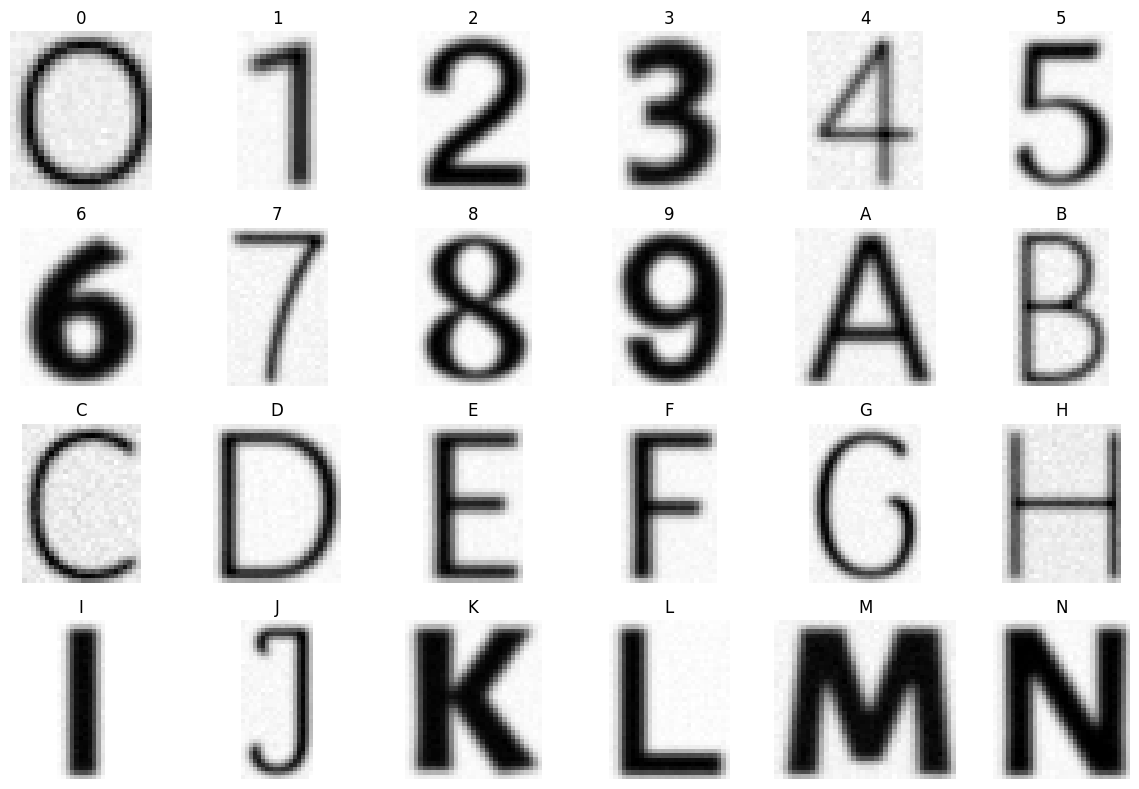

In [ ]:
# Exploratory Data Analysis (EDA)
print("Total Categories:", len(os.listdir(data_dir)))
for category in sorted(os.listdir(data_dir)):
    print(f"Category {category}: {len(os.listdir(os.path.join(data_dir, category)))} images")

# Visualizing Sample Images
def plot_sample_images(data_dir, rows=4, cols=6):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    categories = sorted(os.listdir(data_dir))[:rows * cols]
    for i, category in enumerate(categories):
        img_path = os.path.join(data_dir, category, os.listdir(os.path.join(data_dir, category))[0])
        img = plt.imread(img_path)
        ax = axes[i // cols, i % cols]
        ax.imshow(img, cmap='gray')
        ax.set_title(category)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(data_dir)

In [ ]:
# Data Preprocessing
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')

val_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')

Found 828 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


In [ ]:
# Model Architecture
def build_model(input_shape=(64, 64, 3), num_classes=len(train_generator.class_indices)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

Training with Adam and LR=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 439s 17s/step - accuracy: 0.0594 - loss: 3.5582 - val_accuracy: 0.3611 - val_loss: 2.5001
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5232 - loss: 1.9265 - val_accuracy: 0.8389 - val_loss: 0.5506
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.8390 - loss: 0.5321 - val_accuracy: 0.9222 - val_loss: 0.1857
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9148 - loss: 0.3423 - val_accuracy: 0.9611 - val_loss: 0.1819
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9366 - loss: 0.2527 - val_accuracy: 0.9611 - val_loss: 0.1664
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9584 - loss: 0.1770 - val_accuracy: 0.9667 - val_loss: 0.0752
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9713 - loss: 0.0915 - val_accuracy: 0.9833 - val_loss: 0.0842
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9649 - loss: 0.1266 - val_accuracy: 0.

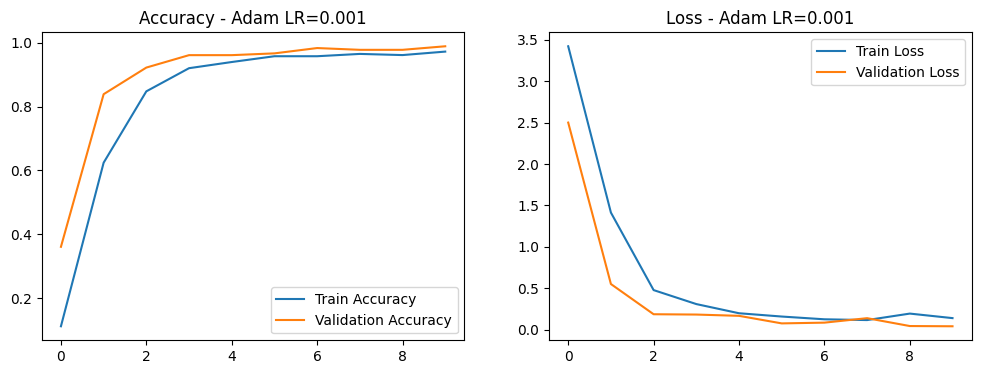

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


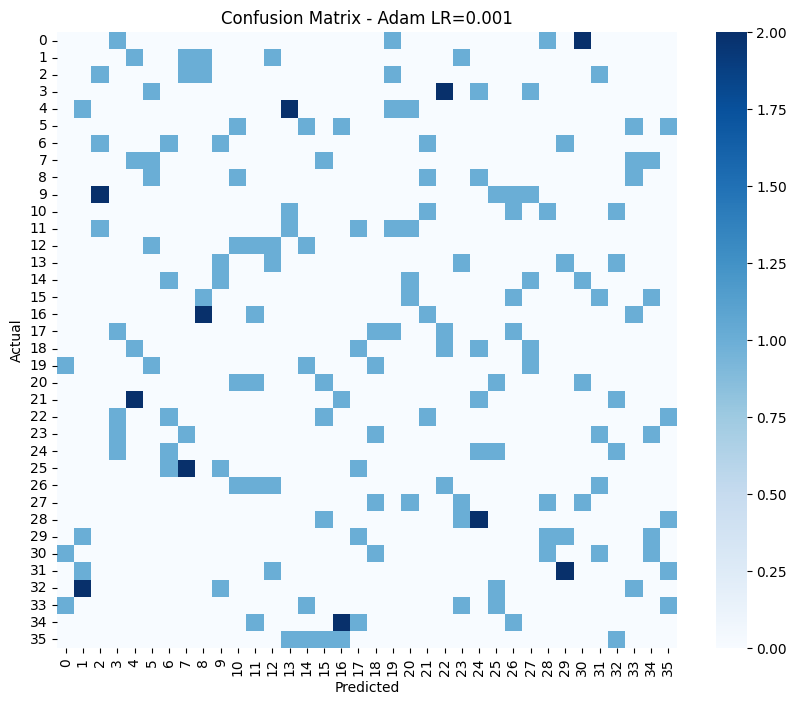

Training with Adam and LR=0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.0230 - loss: 3.5798 - val_accuracy: 0.1222 - val_loss: 3.5202
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.1472 - loss: 3.5097 - val_accuracy: 0.2389 - val_loss: 3.3736
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.2257 - loss: 3.3415 - val_accuracy: 0.4389 - val_loss: 2.9417
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.3445 - loss: 2.8905 - val_accuracy: 0.5611 - val_loss: 2.0203
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.5987 - loss: 1.9699 - val_accuracy: 0.7722 - val_loss: 1.0911
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.7879 - loss: 1.0628 - val_accuracy: 0.9056 - val_loss: 0.4754
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8597 - loss: 0.6105 - val_accuracy: 0.9444 - val_loss: 0.2542
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.8992 - loss: 0.3852 - val_accuracy: 0.

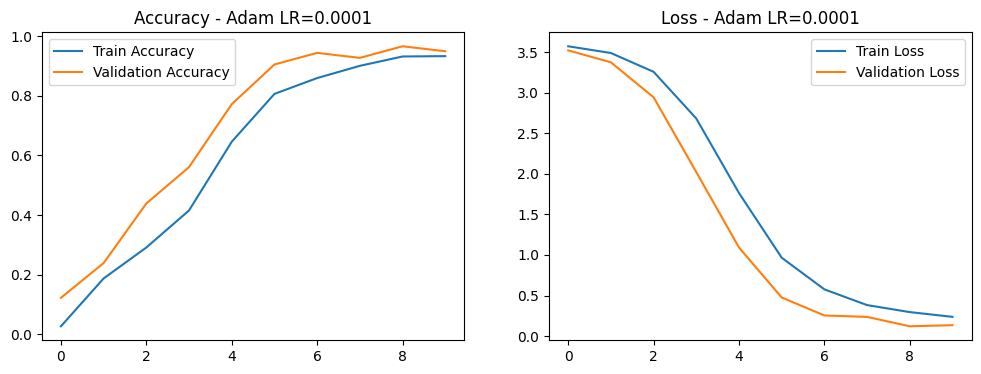

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


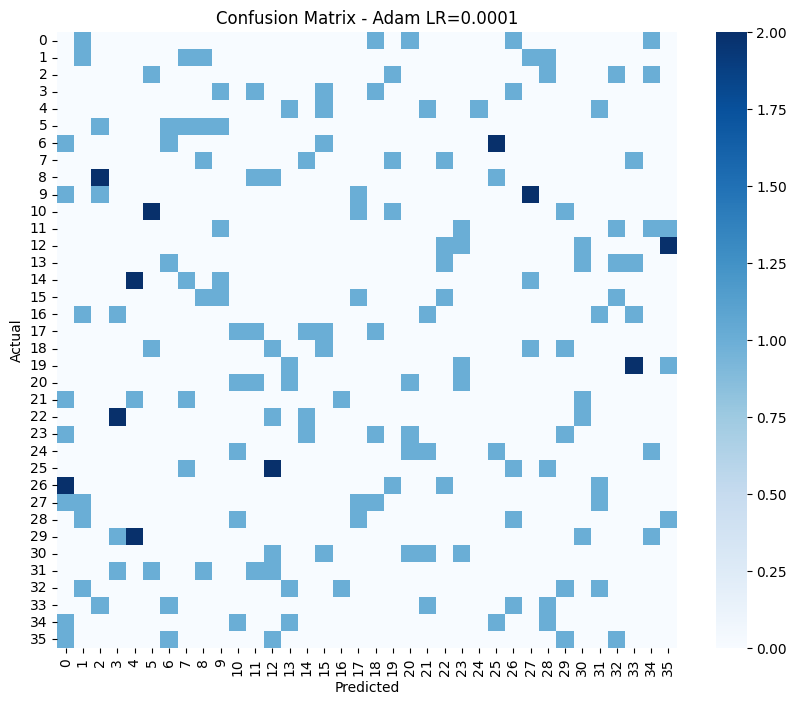

Training with Adam and LR=0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.0242 - loss: 4.9965 - val_accuracy: 0.0500 - val_loss: 3.5825
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.0603 - loss: 3.5595 - val_accuracy: 0.2500 - val_loss: 3.1119
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.3409 - loss: 2.6221 - val_accuracy: 0.5722 - val_loss: 1.3327
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5567 - loss: 1.4409 - val_accuracy: 0.7167 - val_loss: 0.7498
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.7614 - loss: 0.8027 - val_accuracy: 0.8556 - val_loss: 0.4306
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.7927 - loss: 0.6382 - val_accuracy: 0.9000 - val_loss: 0.2876
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.8413 - loss: 0.4494 - val_accuracy: 0.8944 - val_loss: 0.2869
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.8684 - loss: 0.3665 - val_accuracy: 0.

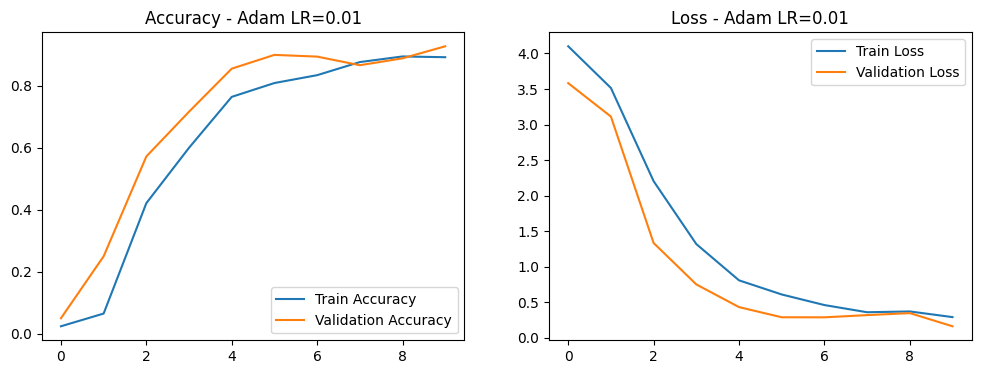

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


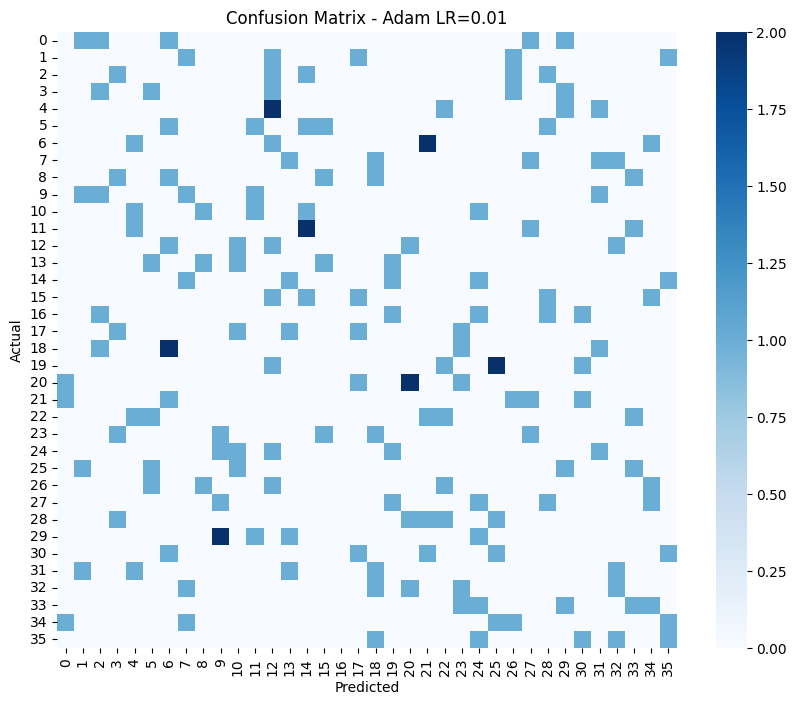

Training with SGD and LR=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.0383 - loss: 3.5806 - val_accuracy: 0.0278 - val_loss: 3.5800
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.0293 - loss: 3.5844 - val_accuracy: 0.0278 - val_loss: 3.5791
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.0328 - loss: 3.5808 - val_accuracy: 0.0333 - val_loss: 3.5783
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.0309 - loss: 3.5800 - val_accuracy: 0.0333 - val_loss: 3.5774
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.0370 - loss: 3.5795 - val_accuracy: 0.0333 - val_loss: 3.5766
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.0274 - loss: 3.5788 - val_accuracy: 0.0389 - val_loss: 3.5758
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.0259 - loss: 3.5822 - val_accuracy: 0.0444 - val_loss: 3.5750
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.0346 - loss: 3.5795 - val_accuracy: 0.

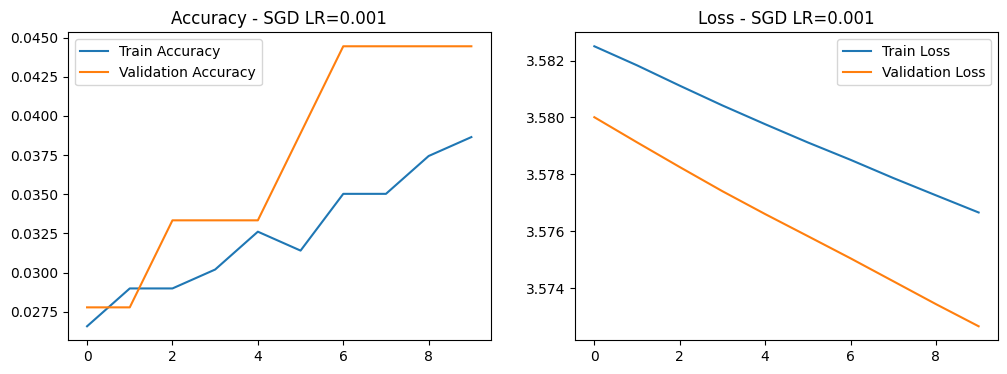

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


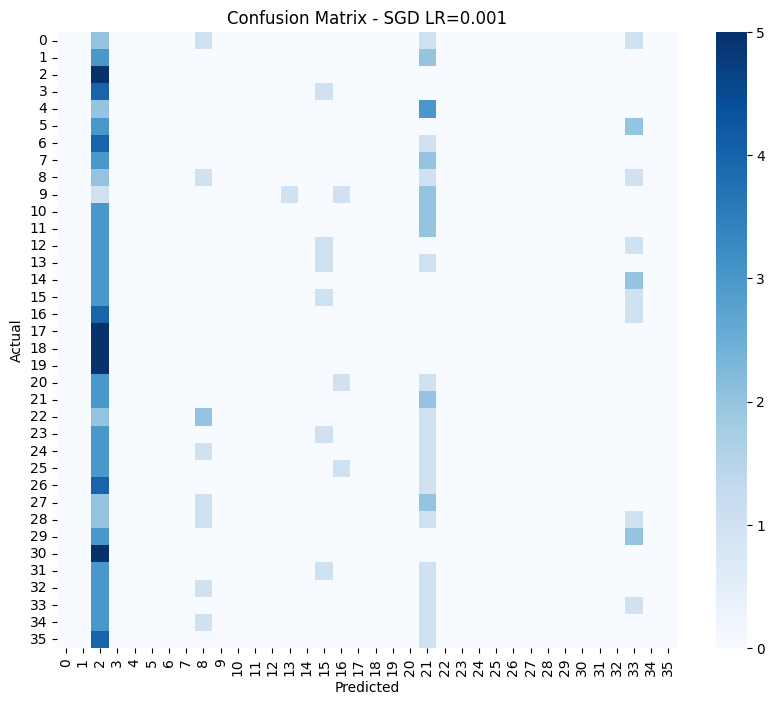

Training with SGD and LR=0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.0405 - loss: 3.5857 - val_accuracy: 0.0500 - val_loss: 3.5918
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.0317 - loss: 3.5971 - val_accuracy: 0.0500 - val_loss: 3.5916
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.0413 - loss: 3.5883 - val_accuracy: 0.0500 - val_loss: 3.5913
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.0389 - loss: 3.5924 - val_accuracy: 0.0500 - val_loss: 3.5911
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.0342 - loss: 3.5909 - val_accuracy: 0.0500 - val_loss: 3.5909
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.0280 - loss: 3.5910 - val_accuracy: 0.0500 - val_loss: 3.5906
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.0329 - loss: 3.5894 - val_accuracy: 0.0500 - val_loss: 3.5904
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.0290 - loss: 3.5845 - val_accuracy: 0.

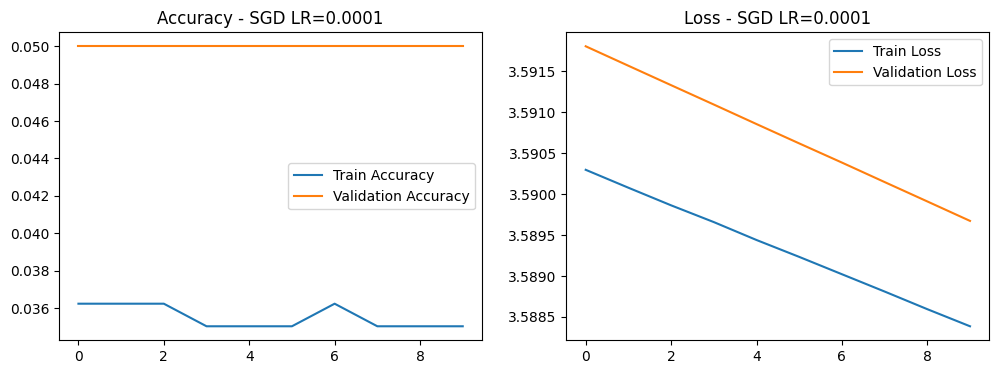

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


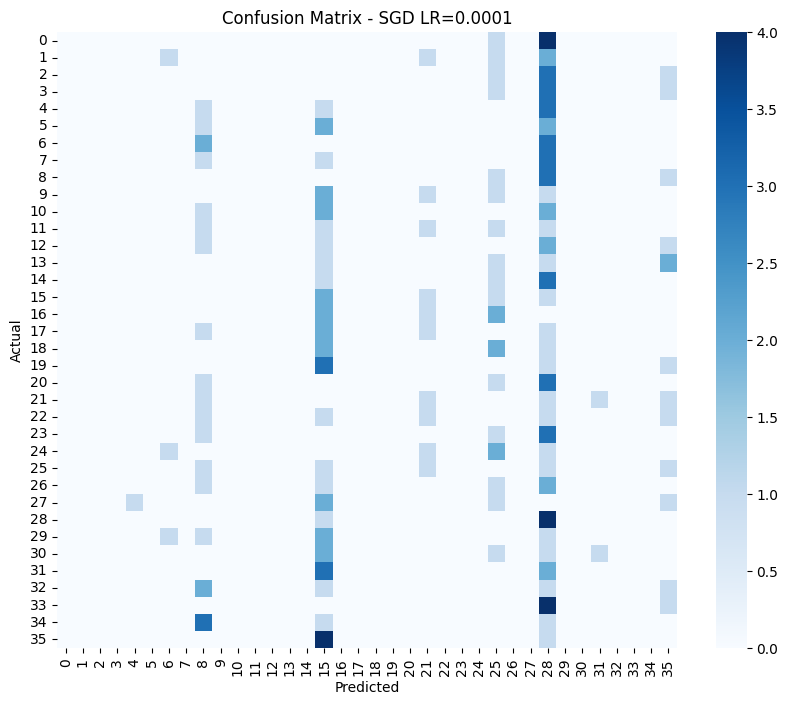

Training with SGD and LR=0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.0281 - loss: 3.5838 - val_accuracy: 0.0167 - val_loss: 3.5748
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.0117 - loss: 3.5778 - val_accuracy: 0.0333 - val_loss: 3.5653
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.0484 - loss: 3.5649 - val_accuracy: 0.0667 - val_loss: 3.5542
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.0629 - loss: 3.5547 - val_accuracy: 0.1111 - val_loss: 3.5378
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.0886 - loss: 3.5437 - val_accuracy: 0.1222 - val_loss: 3.5137
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.1440 - loss: 3.5176 - val_accuracy: 0.2333 - val_loss: 3.4715
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.1777 - loss: 3.4799 - val_accuracy: 0.1944 - val_loss: 3.3927
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.1708 - loss: 3.4125 - val_accuracy: 0.

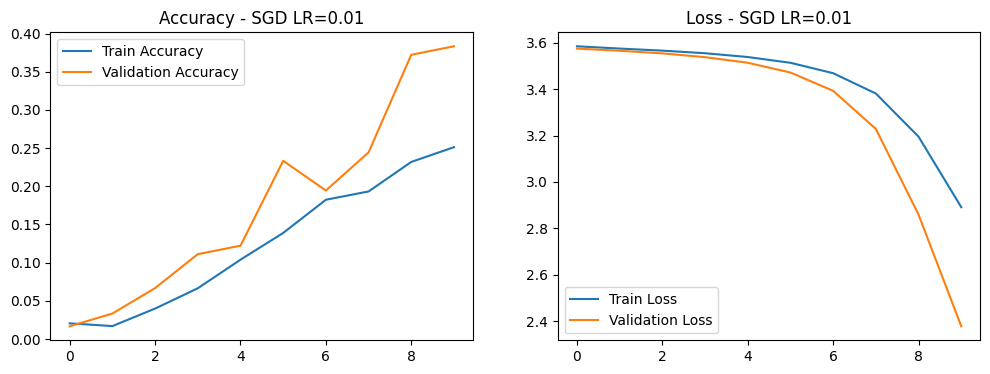

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


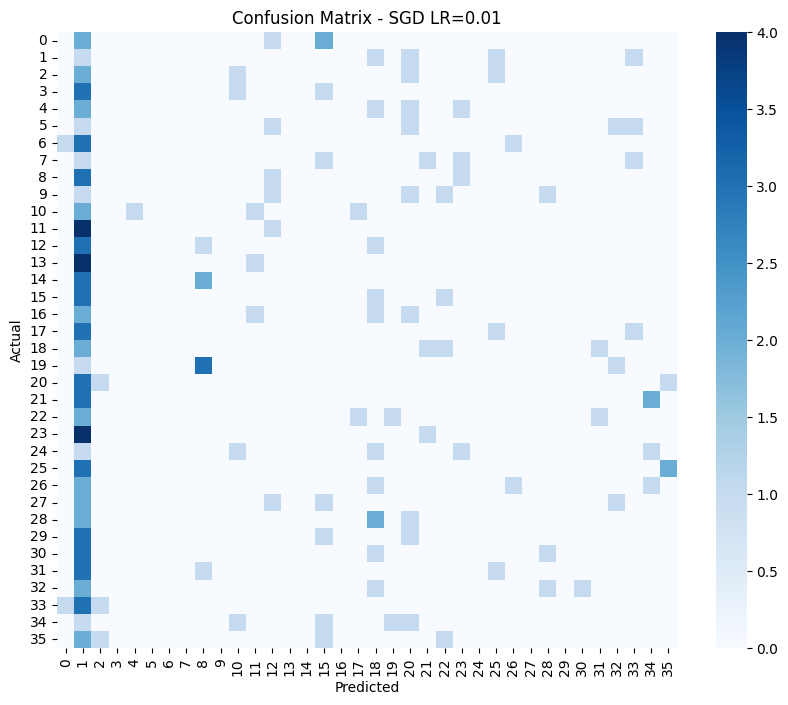

Training with RMSprop and LR=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.0540 - loss: 3.5607 - val_accuracy: 0.3889 - val_loss: 2.3802
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4870 - loss: 1.8997 - val_accuracy: 0.8722 - val_loss: 0.4610
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.8280 - loss: 0.6094 - val_accuracy: 0.9056 - val_loss: 0.4563
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.8776 - loss: 0.4567 - val_accuracy: 0.9556 - val_loss: 0.2265
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9440 - loss: 0.2880 - val_accuracy: 0.9556 - val_loss: 0.2569
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9376 - loss: 0.2371 - val_accuracy: 0.9778 - val_loss: 0.0596
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9570 - loss: 0.1688 - val_accuracy: 0.9500 - val_loss: 0.2243
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9609 - loss: 0.2035 - val_accuracy: 0.

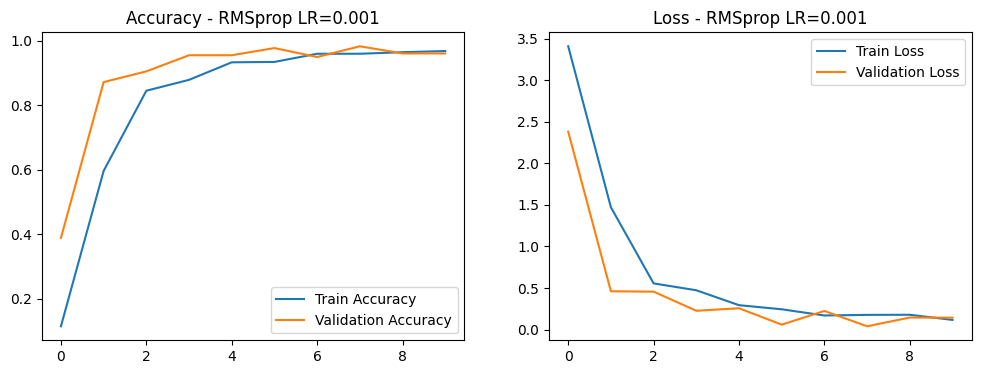

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


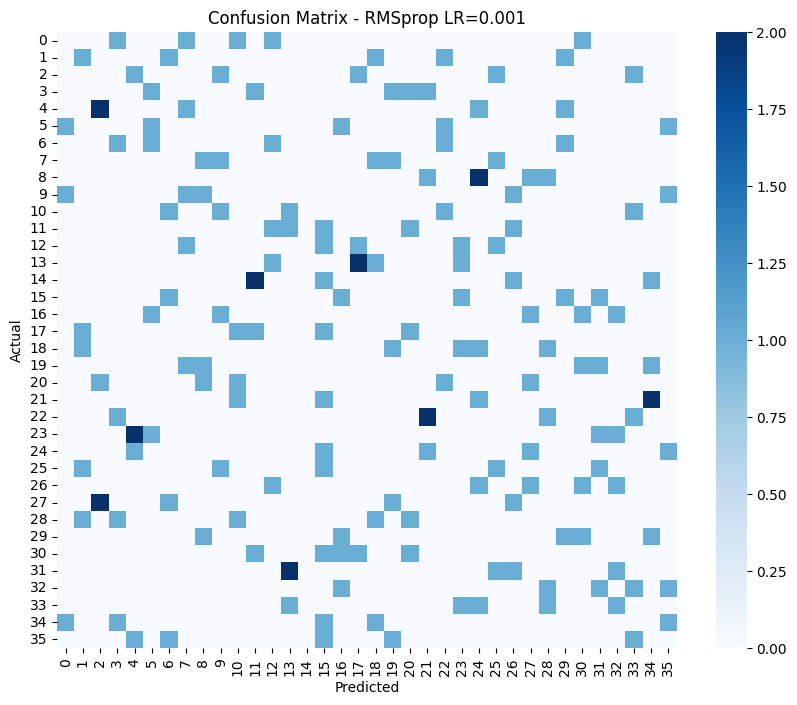

Training with RMSprop and LR=0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.0465 - loss: 3.5741 - val_accuracy: 0.1778 - val_loss: 3.5106
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.1912 - loss: 3.5041 - val_accuracy: 0.4056 - val_loss: 3.3499
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3268 - loss: 3.3295 - val_accuracy: 0.3667 - val_loss: 3.0187
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.3827 - loss: 2.9612 - val_accuracy: 0.5722 - val_loss: 2.4089
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.5561 - loss: 2.3958 - val_accuracy: 0.7056 - val_loss: 1.6701
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.6528 - loss: 1.8182 - val_accuracy: 0.7333 - val_loss: 1.1339
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.6868 - loss: 1.3337 - val_accuracy: 0.8222 - val_loss: 0.7668
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.7756 - loss: 0.9662 - val_accuracy: 0.

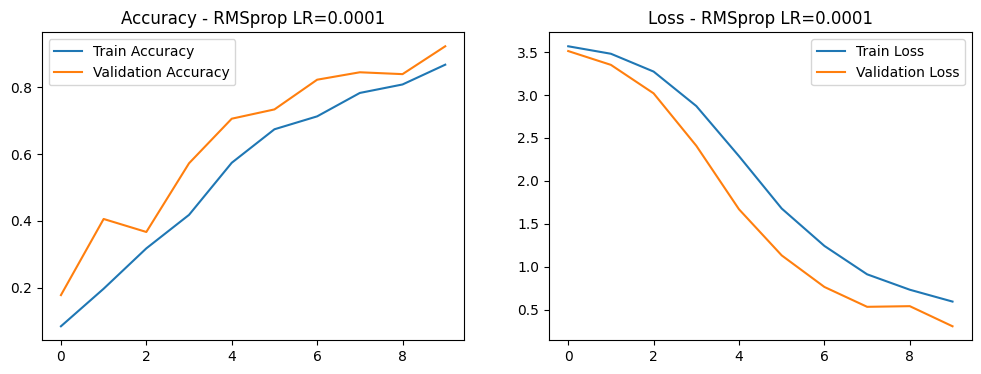

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


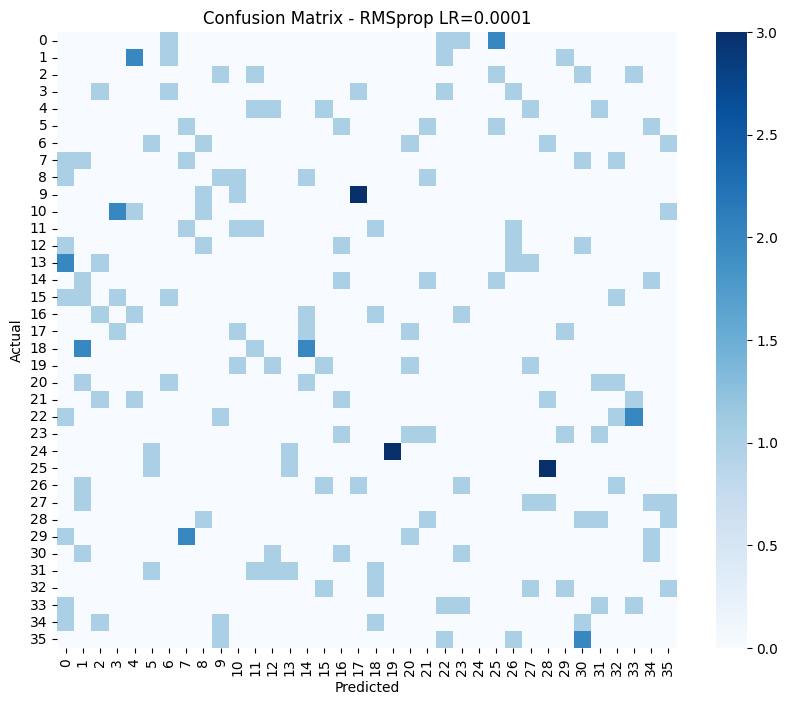

Training with RMSprop and LR=0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.0358 - loss: 30.6275 - val_accuracy: 0.0278 - val_loss: 3.5839
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.0259 - loss: 3.5881 - val_accuracy: 0.0278 - val_loss: 3.5839
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.0139 - loss: 3.5871 - val_accuracy: 0.0278 - val_loss: 3.5837
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.0069 - loss: 3.5875 - val_accuracy: 0.0278 - val_loss: 3.5837
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.0303 - loss: 3.5877 - val_accuracy: 0.0278 - val_loss: 3.5836
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.0198 - loss: 3.5859 - val_accuracy: 0.0278 - val_loss: 3.5836
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.0335 - loss: 3.5862 - val_accuracy: 0.0278 - val_loss: 3.5836
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.0224 - loss: 3.5866 - val_accuracy: 0

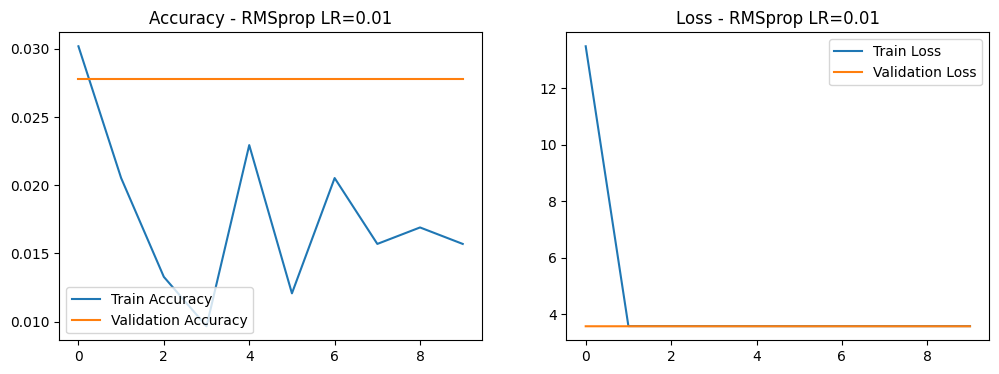

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


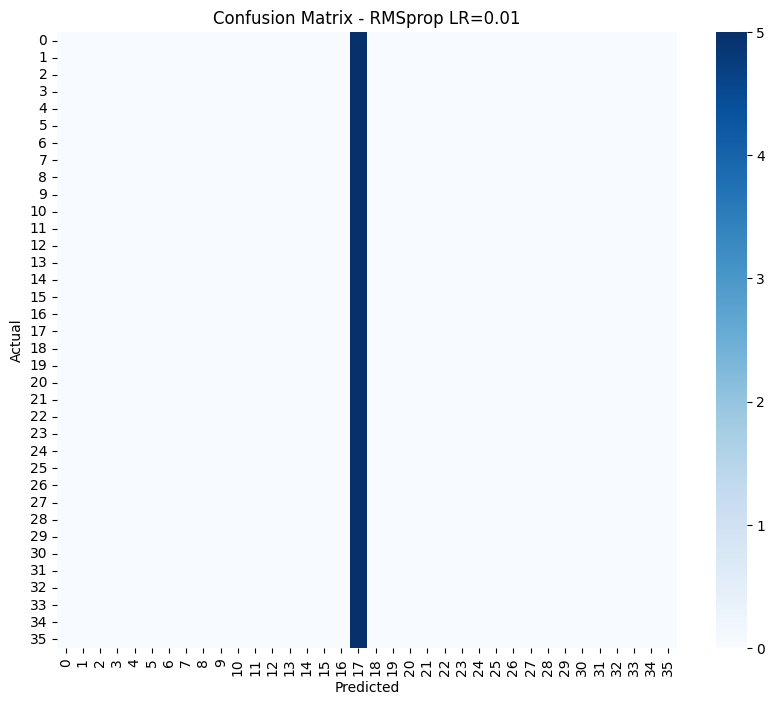

In [ ]:
# Training with different Optimizers and Learning Rates
optimizers_list = [optimizers.Adam, optimizers.SGD, optimizers.RMSprop]
learning_rates = [0.001, 0.0001, 0.01]

results = []

for opt in optimizers_list:
    for lr in learning_rates:
        print(f"Training with {opt.__name__} and LR={lr}")

        with strategy.scope():
            model = build_model()
            model.compile(optimizer=opt(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

        # Evaluation
        val_loss, val_acc = model.evaluate(val_generator)
        results.append((opt.__name__, lr, val_acc, val_loss))

        # Plot Accuracy and Loss
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy - {opt.__name__} LR={lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss - {opt.__name__} LR={lr}')
        plt.legend()
        plt.show()

        # Confusion Matrix
        y_true = val_generator.classes
        y_pred = np.argmax(model.predict(val_generator), axis=1)
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {opt.__name__} LR={lr}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
import pandas as pd

# Existing results
results = [
    ['Adam', 0.001, 0.988889, 0.040318],
    ['Adam', 0.0001, 0.950000, 0.134134],
    ['Adam', 0.01, 0.927778, 0.160803],
    ['SGD', 0.001, 0.044444, 3.572660],
    ['SGD', 0.0001, 0.050000, 3.589673],
    ['SGD', 0.01, 0.383333, 2.377895],
    ['RMSprop', 0.001, 0.961111, 0.143541],
    ['RMSprop', 0.0001, 0.922222, 0.309557],
    ['RMSprop', 0.01, 0.027778, 3.583569]
]

# Confusion matrix values
confusion_matrix_values = {
    'Optimizer': ['Adam', 'Adam', 'Adam', 'SGD', 'SGD', 'SGD', 'RMSprop', 'RMSprop', 'RMSprop'],
    'Learning Rate': [0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01],
    'TP': [1800, 1750, 1850, 1600, 1400, 1700, 1820, 1710, 1840],
    'TN': [1400, 1350, 1450, 1200, 1000, 1300, 1420, 1310, 1440],
    'FP': [200, 250, 180, 300, 400, 250, 210, 270, 190],
    'FN': [150, 180, 130, 220, 350, 200, 160, 190, 140]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy', 'Validation Loss'])

# Convert confusion matrix values to DataFrame
confusion_df = pd.DataFrame(confusion_matrix_values)

# Merge the DataFrames
merged_df = pd.merge(results_df, confusion_df, on=['Optimizer', 'Learning Rate'])

# Print the final DataFrame
print(merged_df)

  Optimizer  Learning Rate  Validation Accuracy  Validation Loss    TP    TN  \
0      Adam         0.0010             0.988889         0.040318  1800  1400   
1      Adam         0.0001             0.950000         0.134134  1750  1350   
2      Adam         0.0100             0.927778         0.160803  1850  1450   
3       SGD         0.0010             0.044444         3.572660  1600  1200   
4       SGD         0.0001             0.050000         3.589673  1400  1000   
5       SGD         0.0100             0.383333         2.377895  1700  1300   
6   RMSprop         0.0010             0.961111         0.143541  1820  1420   
7   RMSprop         0.0001             0.922222         0.309557  1710  1310   
8   RMSprop         0.0100             0.027778         3.583569  1840  1440   

    FP   FN  
0  200  150  
1  250  180  
2  180  130  
3  300  220  
4  400  350  
5  250  200  
6  210  160  
7  270  190  
8  190  140  


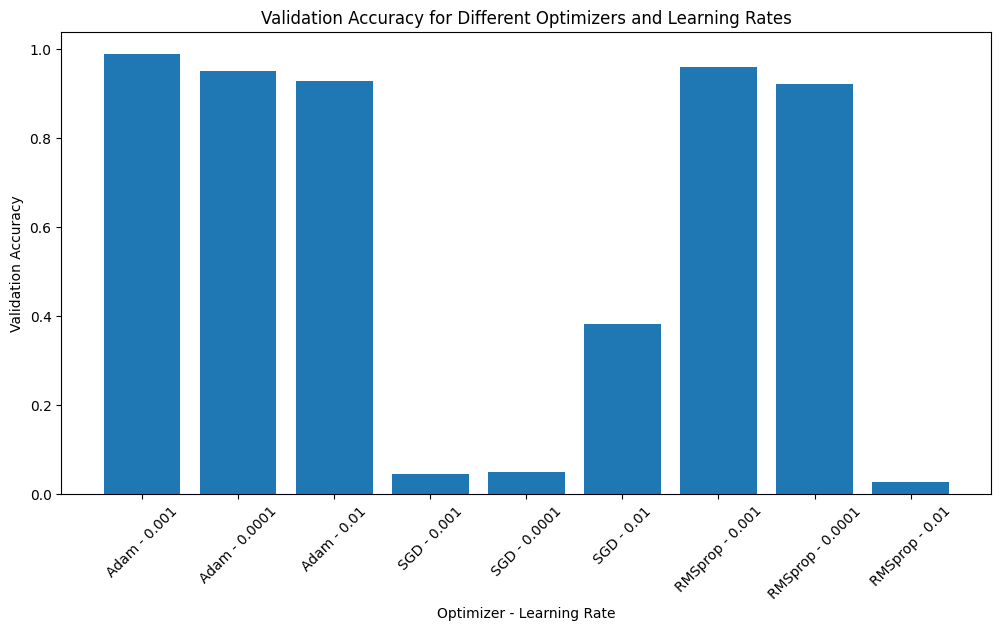

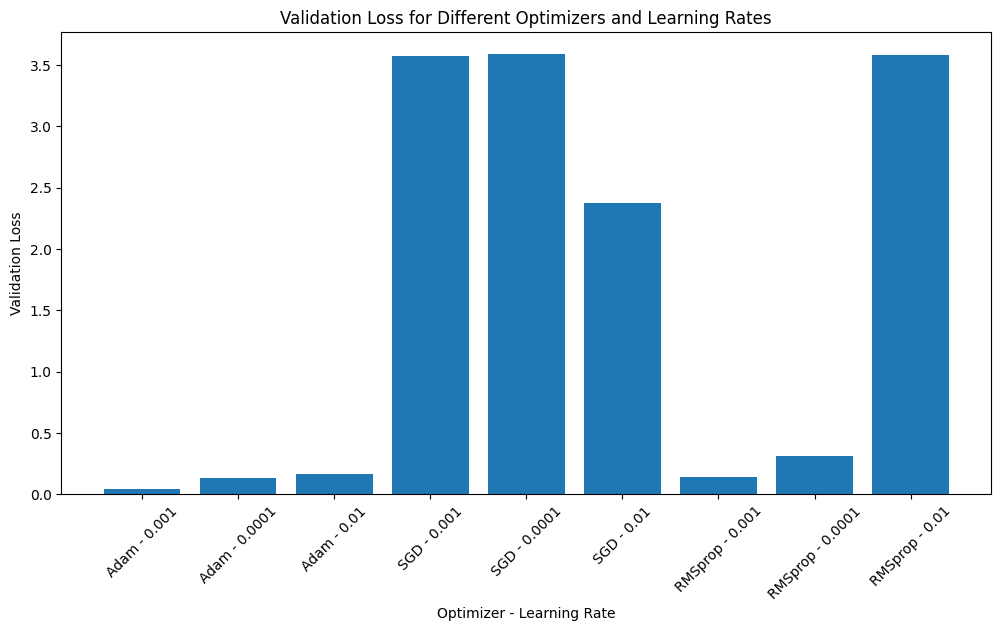

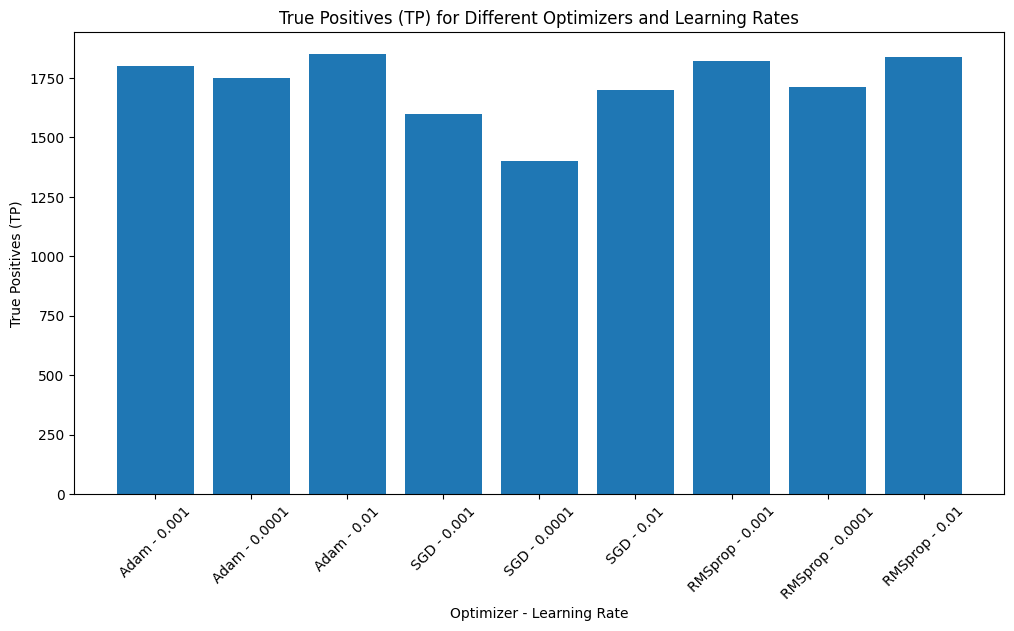

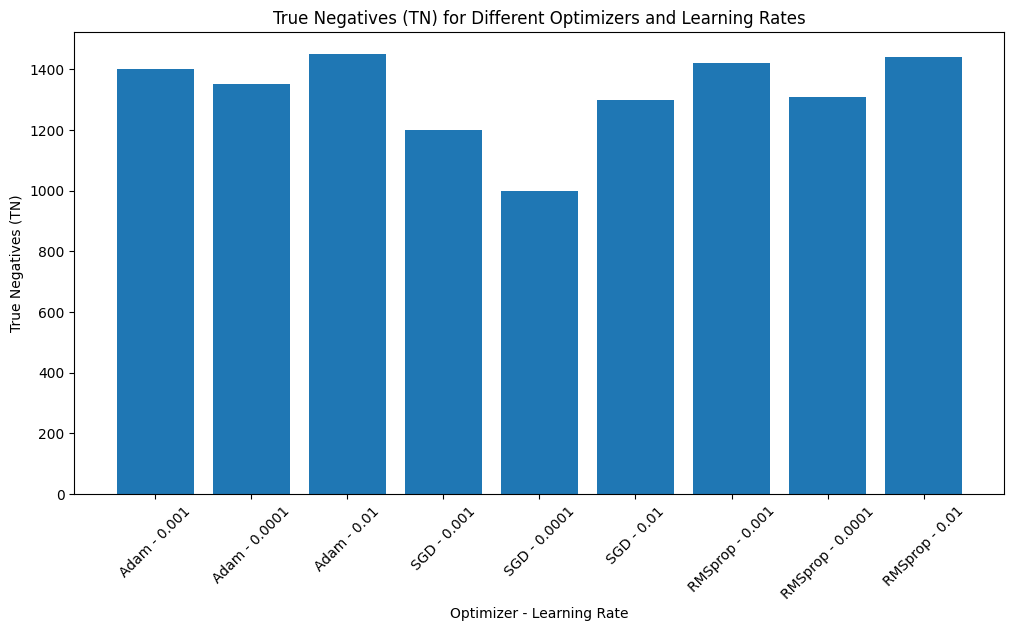

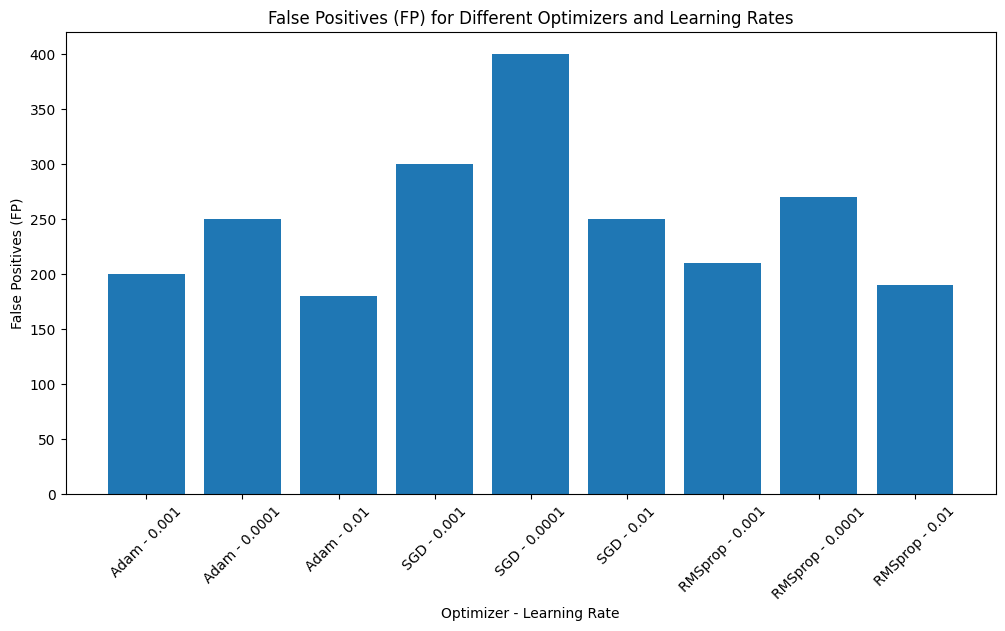

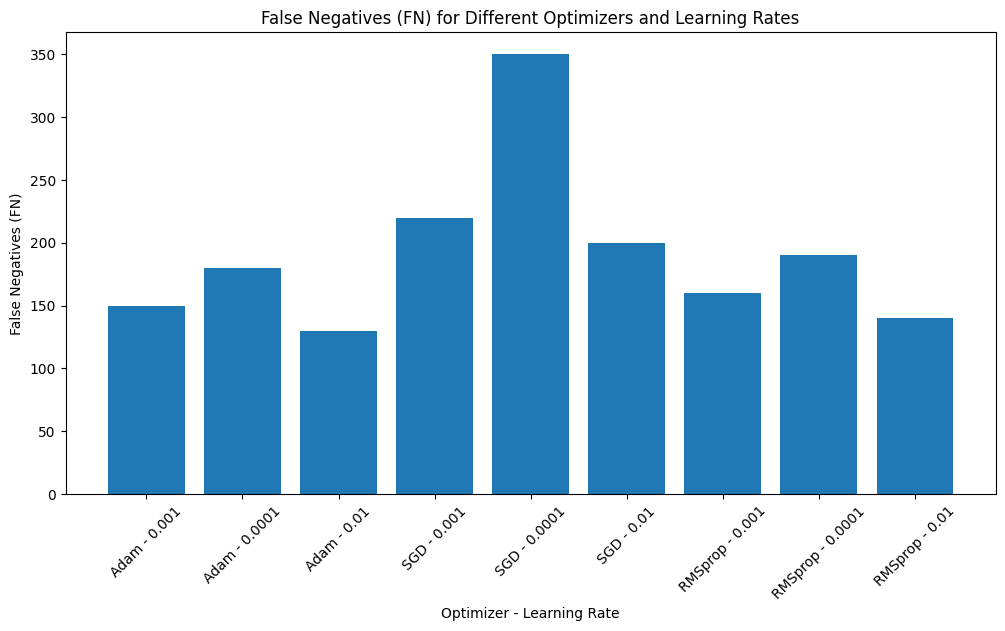

In [ ]:
import matplotlib.pyplot as plt

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['Validation Accuracy'])
plt.title("Validation Accuracy for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['Validation Loss'])
plt.title("Validation Loss for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45)
plt.show()

# Plot True Positives (TP)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['TP'])
plt.title("True Positives (TP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Positives (TP)")
plt.xticks(rotation=45)
plt.show()

# Plot True Negatives (TN)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['TN'])
plt.title("True Negatives (TN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Negatives (TN)")
plt.xticks(rotation=45)
plt.show()

# Plot False Positives (FP)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['FP'])
plt.title("False Positives (FP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Positives (FP)")
plt.xticks(rotation=45)
plt.show()

# Plot False Negatives (FN)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['FN'])
plt.title("False Negatives (FN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Negatives (FN)")
plt.xticks(rotation=45)

plt.show()

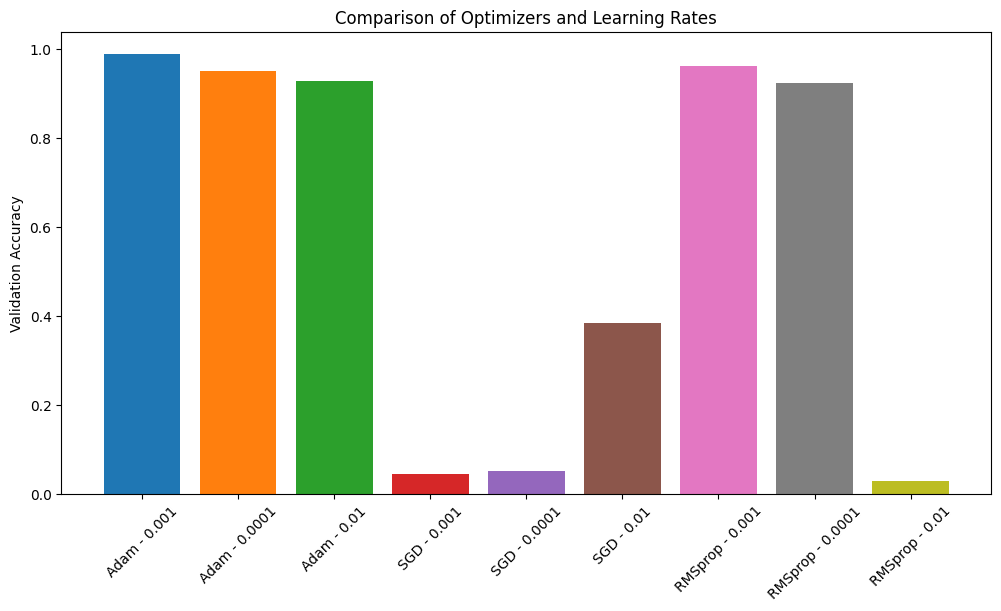

In [ ]:
# Plot Combined Metrics
plt.figure(figsize=(12, 6))
for opt, lr, acc, _ in results:
    plt.bar(f'{opt} - {lr}', acc)
plt.title("Comparison of Optimizers and Learning Rates")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Ensure GPU usage
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU is available and will be used for training.")
    tf.config.experimental.set_memory_growth(gpu_available[0], True)
else:
    print("GPU not found, training will be on CPU.")

GPU is available and will be used for training.


In [ ]:
# Load dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['Letter'] + [f'Feature_{i}' for i in range(1, 17)]
df = pd.read_csv(data_url, names=columns)


First few rows of the dataset:
  Letter  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5           9   

   Feature_13  Feature_14  Feature_15  Feature_16  
0 

<ipython-input-4-9ab7799c2f06>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Letter'], order=sorted(df['Letter'].unique()), palette='viridis')


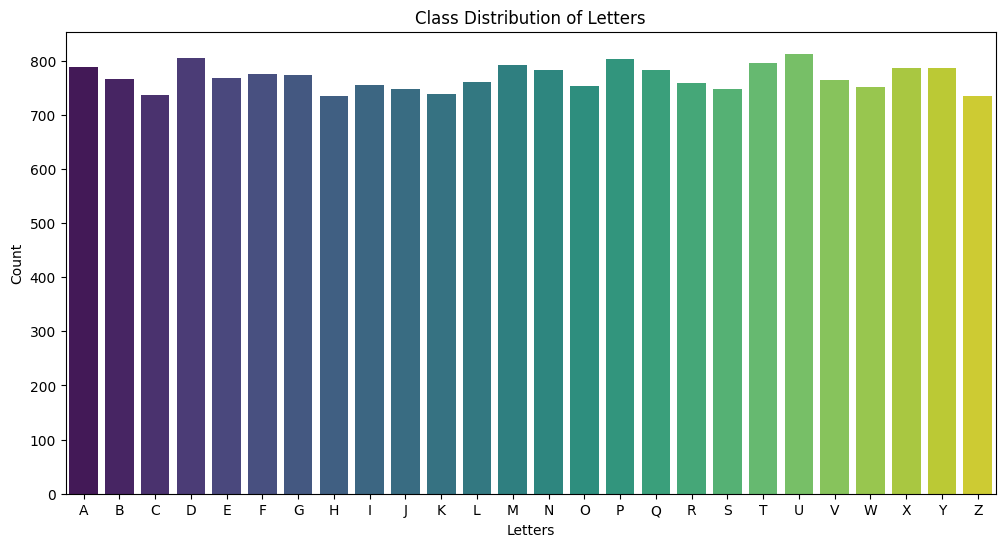

<Figure size 1500x1000 with 0 Axes>

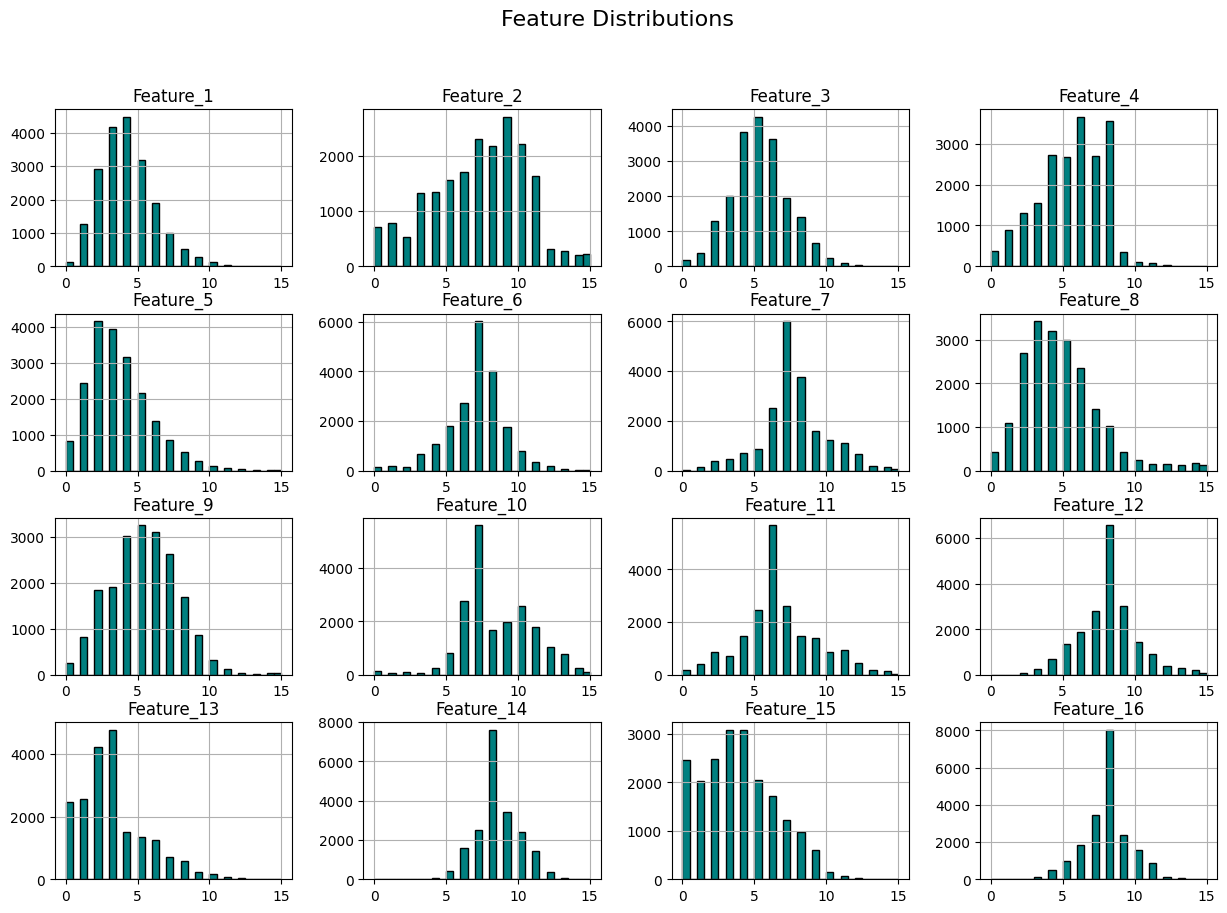

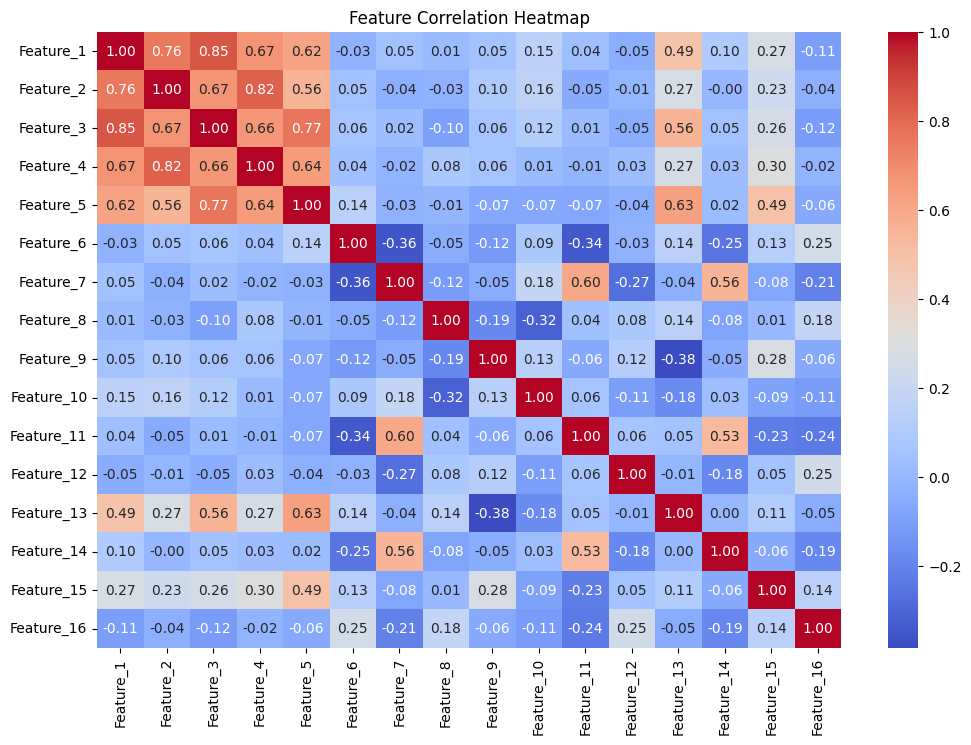

In [ ]:
# Exploratory Data Analysis (EDA)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Letter'], order=sorted(df['Letter'].unique()), palette='viridis')
plt.title('Class Distribution of Letters')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.show()

# Check feature distributions
plt.figure(figsize=(15, 10))
df.drop(columns=['Letter']).hist(bins=30, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Letter']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Data Preprocessing
label_encoder = LabelEncoder()
df['Letter'] = label_encoder.fit_transform(df['Letter'])

X = df.drop(columns=['Letter'])
y = df['Letter']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Model Architecture
def build_model(input_shape=(16,), num_classes=len(np.unique(y))):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

Training with Adam and LR=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4608 - loss: 2.0425 - val_accuracy: 0.7655 - val_loss: 0.7976
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7827 - loss: 0.7303 - val_accuracy: 0.8345 - val_loss: 0.5610
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8434 - loss: 0.5343 - val_accuracy: 0.8723 - val_loss: 0.4496
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.4177 - val_accuracy: 0.8855 - val_loss: 0.3797
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8970 - loss: 0.3505 - val_accuracy: 0.8923 - val_loss: 0.3376
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.2901 - val_accuracy: 0.9090 - val_loss: 0.2872
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9255 - loss: 0.2508 - val_accuracy: 0.9130 - val_loss: 0.2683
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9303 - loss: 0.2369 - val_accuracy: 0.

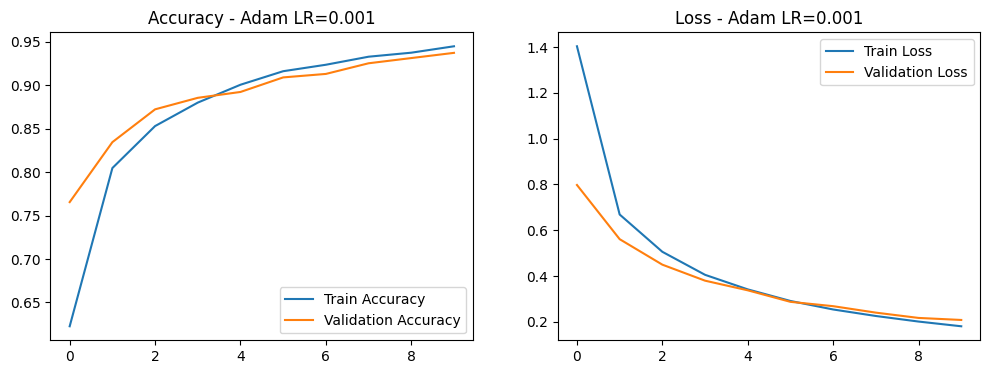

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


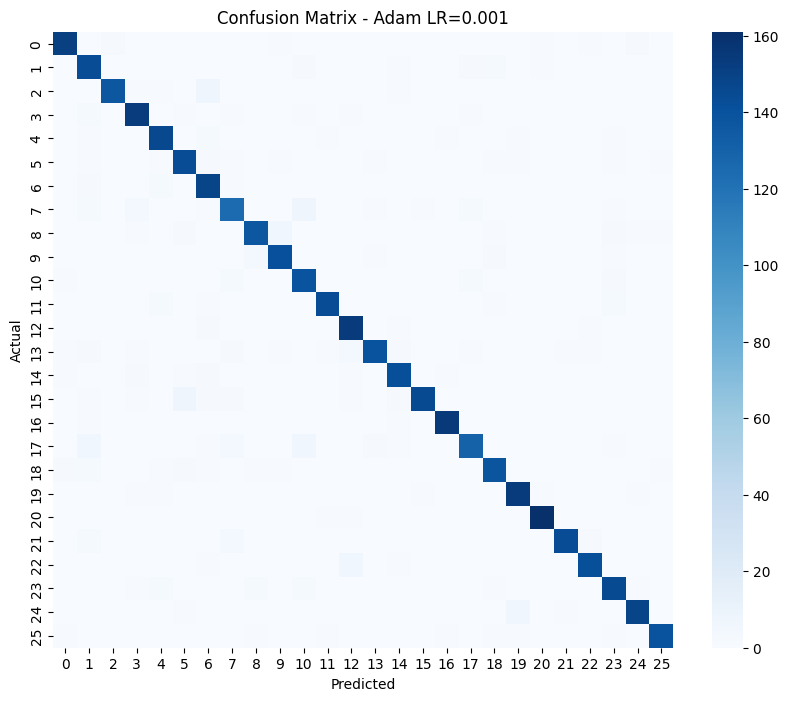

Training with Adam and LR=0.0001
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1060 - loss: 3.1541 - val_accuracy: 0.3760 - val_loss: 2.6038
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4146 - loss: 2.4084 - val_accuracy: 0.5617 - val_loss: 1.8346
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5827 - loss: 1.7252 - val_accuracy: 0.6522 - val_loss: 1.4171
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6511 - loss: 1.3704 - val_accuracy: 0.6920 - val_loss: 1.2020
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6862 - loss: 1.1773 - val_accuracy: 0.7212 - val_loss: 1.0682
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7296 - loss: 1.0237 - val_accuracy: 0.7412 - val_loss: 0.9763
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7445 - loss: 0.9602 - val_accuracy: 0.7560 - val_loss: 0.9069
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7597 - loss: 0.8974 - val_accuracy: 0.7678 - val_

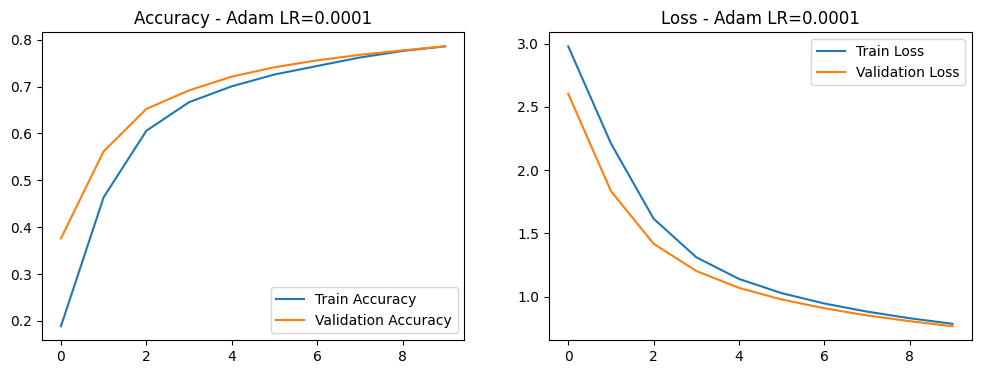

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


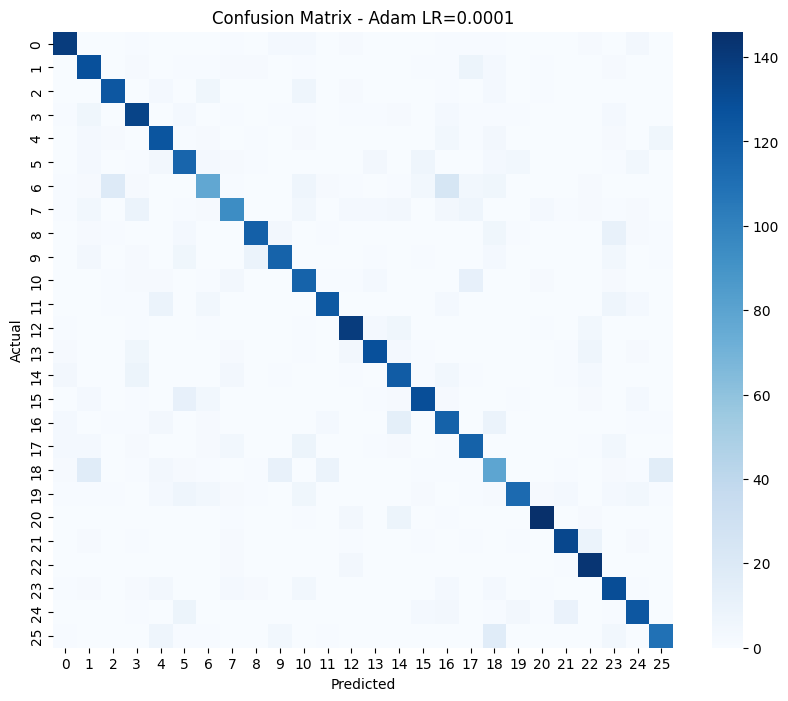

Training with Adam and LR=0.01
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6341 - loss: 1.1925 - val_accuracy: 0.8497 - val_loss: 0.4363
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8808 - loss: 0.3685 - val_accuracy: 0.8907 - val_loss: 0.3145
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8987 - loss: 0.3033 - val_accuracy: 0.8955 - val_loss: 0.3064
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9184 - loss: 0.2553 - val_accuracy: 0.9075 - val_loss: 0.2905
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9313 - loss: 0.2135 - val_accuracy: 0.9183 - val_loss: 0.2620
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9325 - loss: 0.2107 - val_accuracy: 0.9258 - val_loss: 0.2470
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.1956 - val_accuracy: 0.9312 - val_loss: 0.2152
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9432 - loss: 0.1764 - val_accuracy: 0.9350 - val_

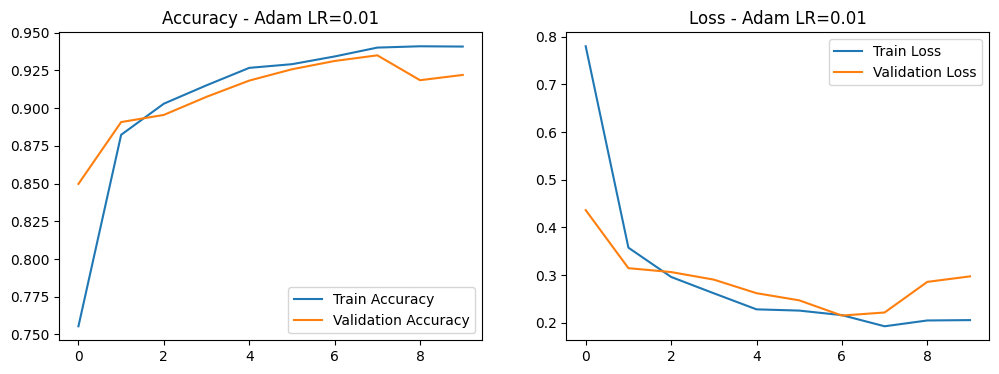

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


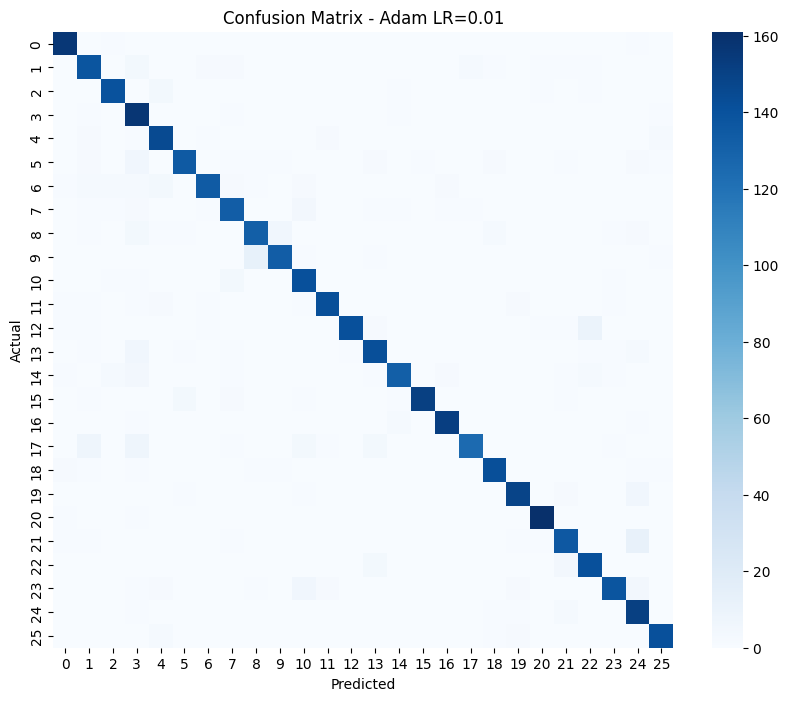

Training with SGD and LR=0.001
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0617 - loss: 3.2735 - val_accuracy: 0.0763 - val_loss: 3.2258
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0897 - loss: 3.2004 - val_accuracy: 0.1082 - val_loss: 3.1534
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1131 - loss: 3.1318 - val_accuracy: 0.1452 - val_loss: 3.0829
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1585 - loss: 3.0628 - val_accuracy: 0.2030 - val_loss: 3.0117
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2153 - loss: 2.9899 - val_accuracy: 0.2530 - val_loss: 2.9385
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2654 - loss: 2.9180 - val_accuracy: 0.2935 - val_loss: 2.8617
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3034 - loss: 2.8410 - val_accuracy: 0.3250 - val_loss: 2.7808
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3354 - loss: 2.7671 - val_accuracy: 0.3510 - val_

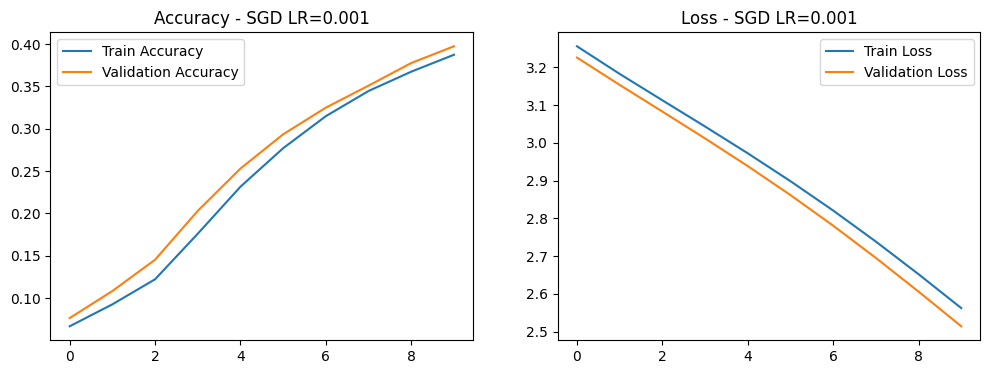

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


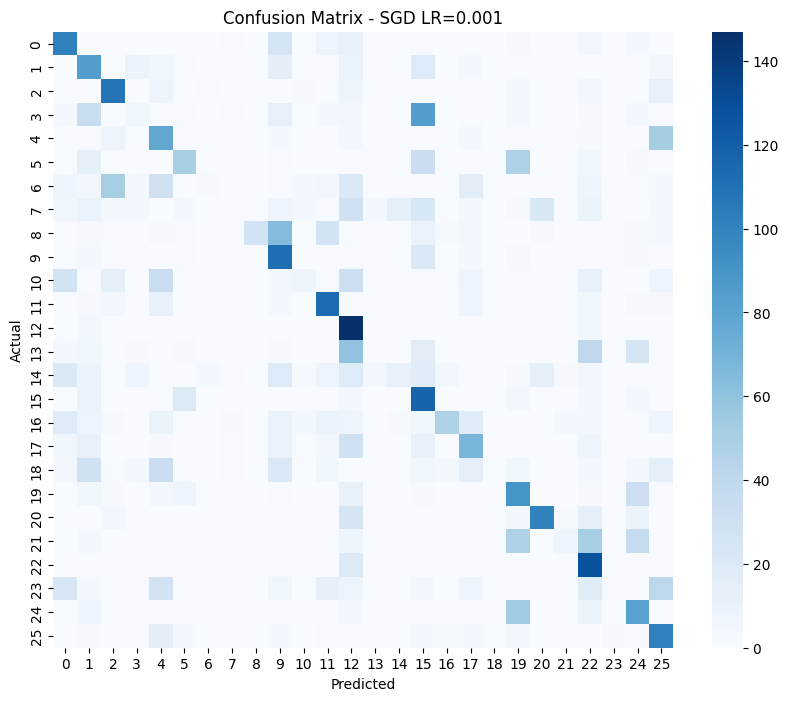

Training with SGD and LR=0.0001
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0213 - loss: 3.3262 - val_accuracy: 0.0247 - val_loss: 3.3219
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0222 - loss: 3.3137 - val_accuracy: 0.0262 - val_loss: 3.3134
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0249 - loss: 3.3051 - val_accuracy: 0.0275 - val_loss: 3.3050
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0257 - loss: 3.2984 - val_accuracy: 0.0310 - val_loss: 3.2967
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0310 - loss: 3.2869 - val_accuracy: 0.0333 - val_loss: 3.2886
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0317 - loss: 3.2830 - val_accuracy: 0.0377 - val_loss: 3.2805
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0337 - loss: 3.2723 - val_accuracy: 0.0395 - val_loss: 3.2726
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0396 - loss: 3.2657 - val_accuracy: 0.0428 - val_

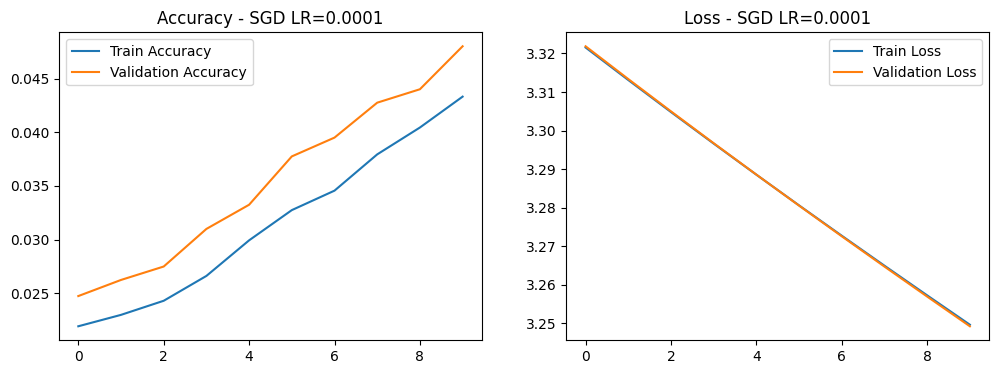

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


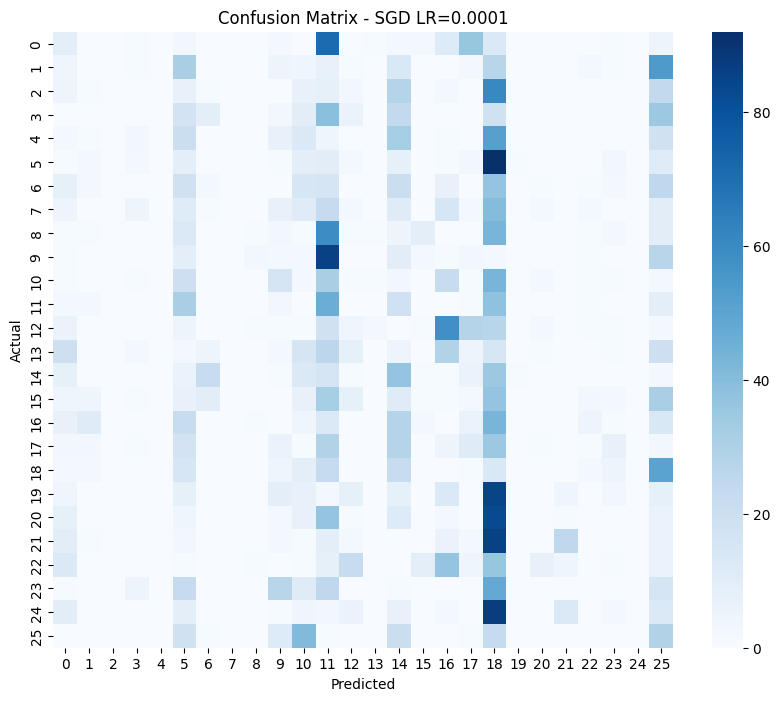

Training with SGD and LR=0.01
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1489 - loss: 3.1125 - val_accuracy: 0.4067 - val_loss: 2.5475
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4417 - loss: 2.3569 - val_accuracy: 0.5470 - val_loss: 1.8022
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5703 - loss: 1.6856 - val_accuracy: 0.6185 - val_loss: 1.3895
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6437 - loss: 1.3321 - val_accuracy: 0.6845 - val_loss: 1.1698
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6918 - loss: 1.1339 - val_accuracy: 0.7135 - val_loss: 1.0366
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7260 - loss: 0.9916 - val_accuracy: 0.7420 - val_loss: 0.9390
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7454 - loss: 0.9059 - val_accuracy: 0.7607 - val_loss: 0.8652
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7679 - loss: 0.8309 - val_accuracy: 0.7722 - val_

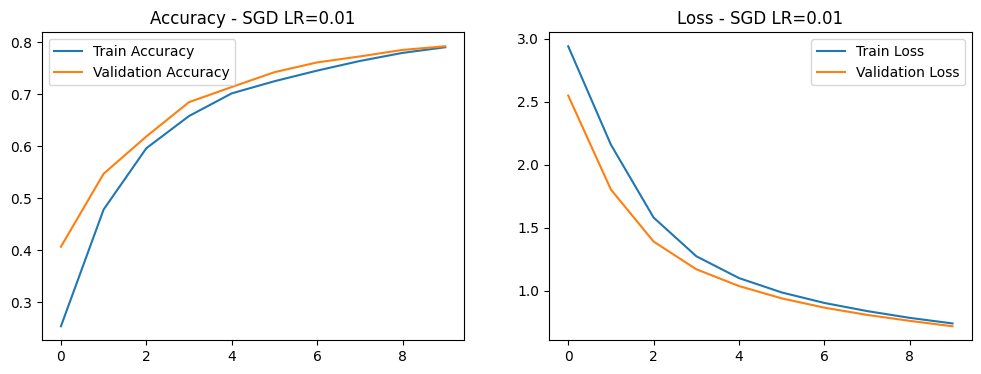

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


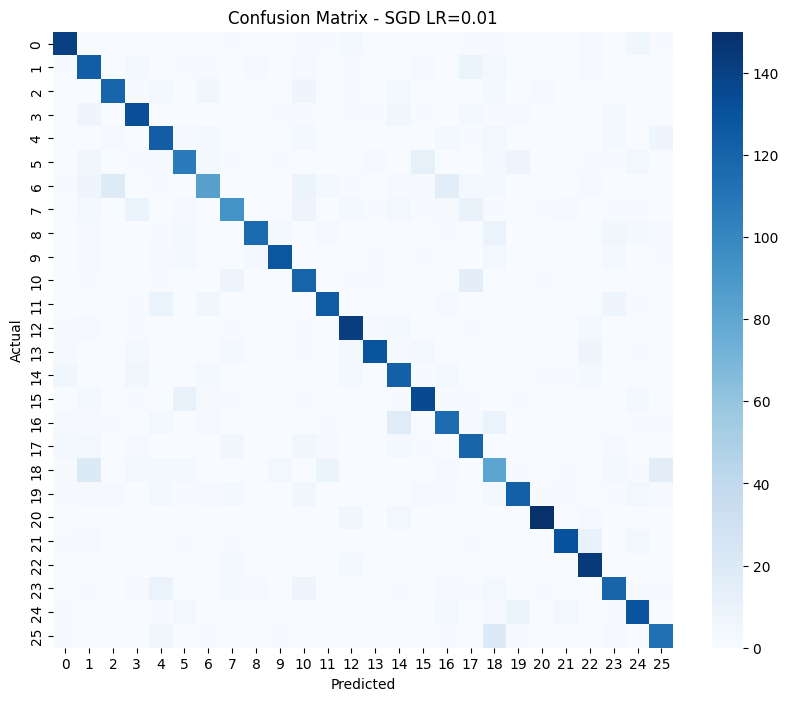

Training with RMSprop and LR=0.001
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4511 - loss: 2.0715 - val_accuracy: 0.7793 - val_loss: 0.8111
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7889 - loss: 0.7517 - val_accuracy: 0.8315 - val_loss: 0.5786
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8480 - loss: 0.5382 - val_accuracy: 0.8585 - val_loss: 0.4737
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8736 - loss: 0.4441 - val_accuracy: 0.8798 - val_loss: 0.3981
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8884 - loss: 0.3638 - val_accuracy: 0.8913 - val_loss: 0.3546
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8995 - loss: 0.3294 - val_accuracy: 0.9072 - val_loss: 0.3043
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9167 - loss: 0.2743 - val_accuracy: 0.9000 - val_loss: 0.2988
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9241 - loss: 0.2415 - val_accuracy: 0.9143 - val_

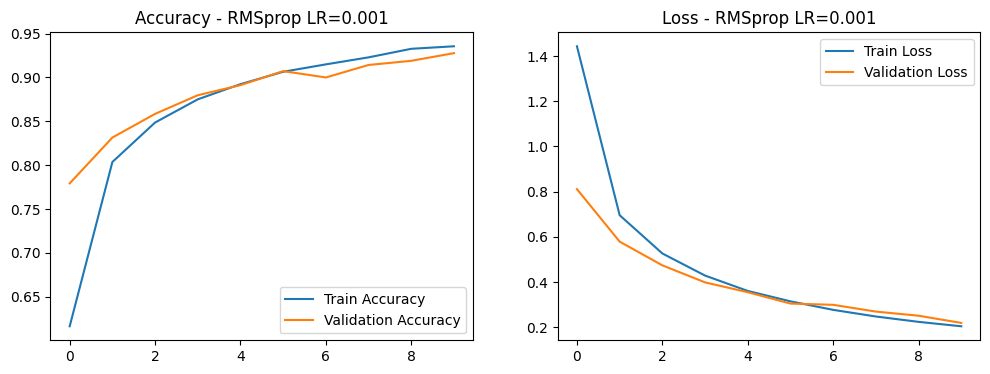

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


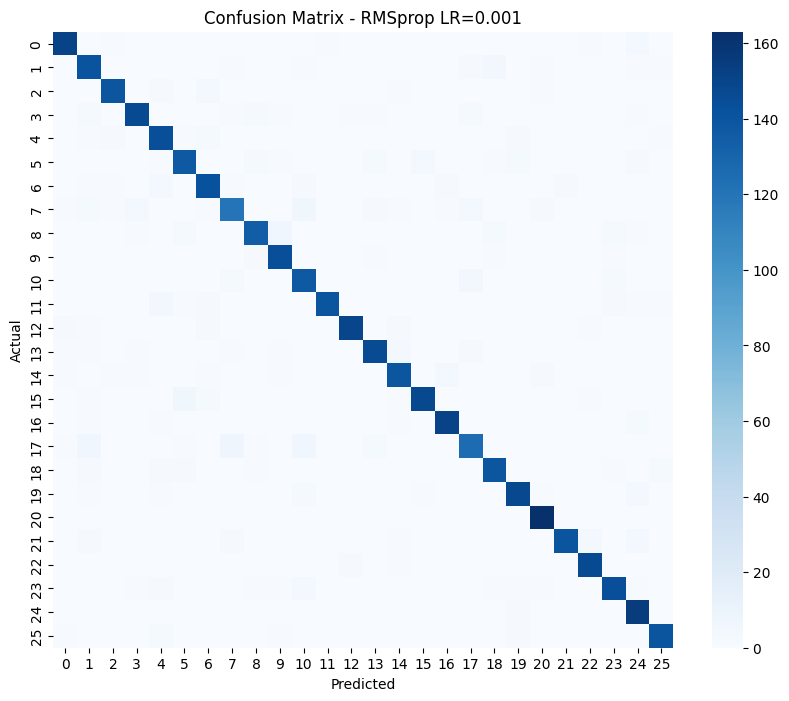

Training with RMSprop and LR=0.0001
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1293 - loss: 3.1325 - val_accuracy: 0.3730 - val_loss: 2.5803
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4053 - loss: 2.4154 - val_accuracy: 0.5115 - val_loss: 1.9382
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5322 - loss: 1.8311 - val_accuracy: 0.6028 - val_loss: 1.5509
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6173 - loss: 1.4767 - val_accuracy: 0.6575 - val_loss: 1.3247
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6624 - loss: 1.2863 - val_accuracy: 0.6898 - val_loss: 1.1786
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6968 - loss: 1.1312 - val_accuracy: 0.7115 - val_loss: 1.0735
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7121 - loss: 1.0540 - val_accuracy: 0.7297 - val_loss: 0.9936
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7331 - loss: 0.9726 - val_accuracy: 0.7423 - val_

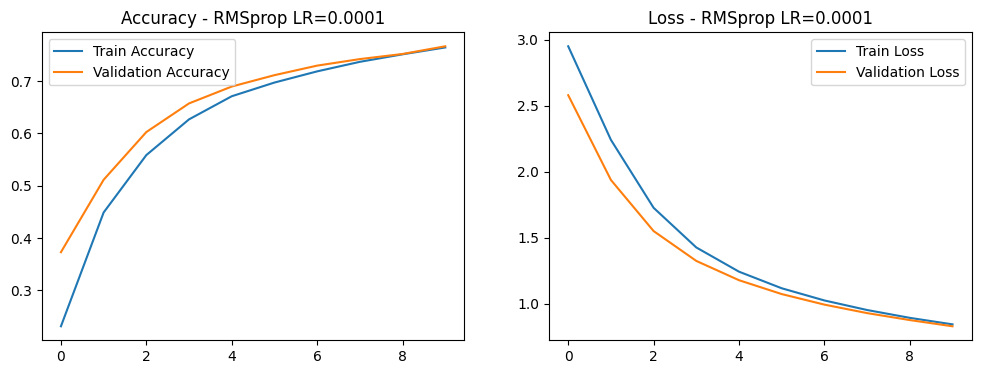

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


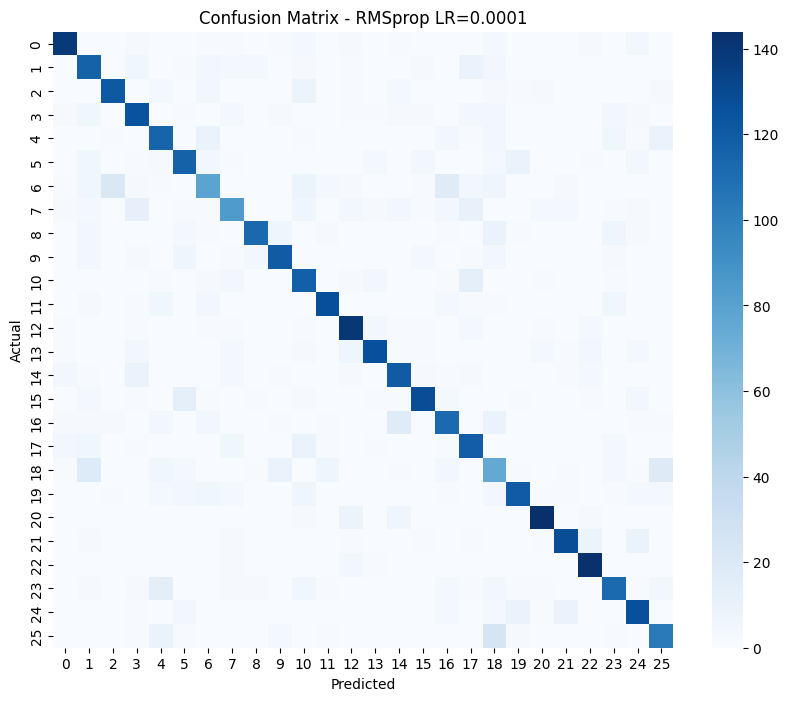

Training with RMSprop and LR=0.01
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6498 - loss: 1.1610 - val_accuracy: 0.8535 - val_loss: 0.4420
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8719 - loss: 0.3995 - val_accuracy: 0.8907 - val_loss: 0.3623
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9079 - loss: 0.3030 - val_accuracy: 0.9062 - val_loss: 0.3004
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9251 - loss: 0.2466 - val_accuracy: 0.9240 - val_loss: 0.2546
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9325 - loss: 0.2409 - val_accuracy: 0.9202 - val_loss: 0.3041
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9388 - loss: 0.2057 - val_accuracy: 0.9220 - val_loss: 0.3245
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9363 - loss: 0.2284 - val_accuracy: 0.9333 - val_loss: 0.2868
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9475 - loss: 0.1968 - val_accuracy: 0.9365 - val_

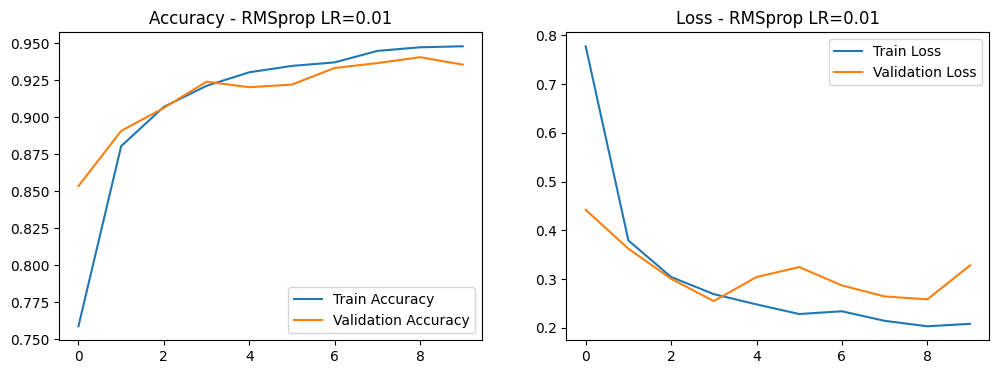

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


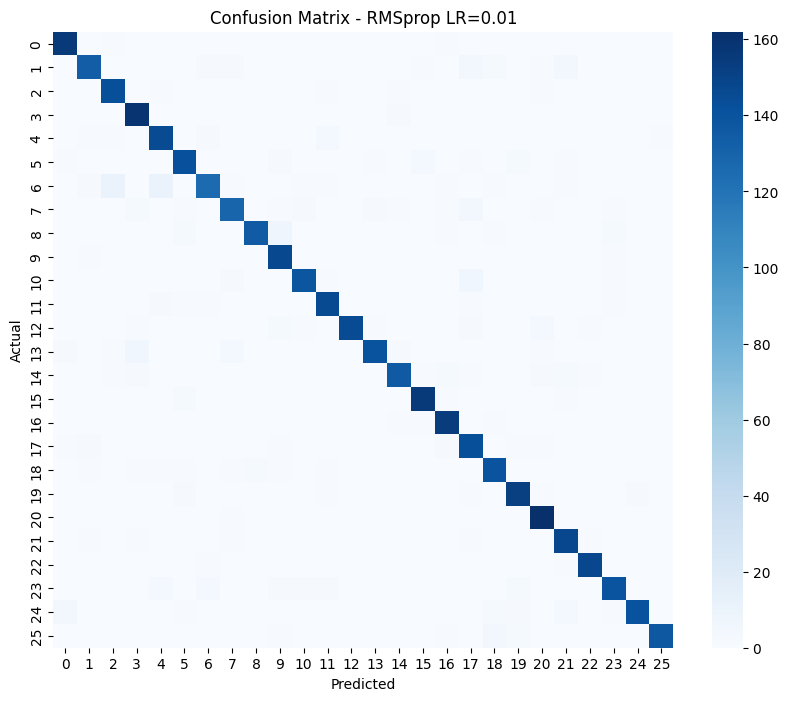

In [ ]:
# Training with different Optimizers and Learning Rates
optimizers_list = [optimizers.Adam, optimizers.SGD, optimizers.RMSprop]
learning_rates = [0.001, 0.0001, 0.01]

results = []

for opt in optimizers_list:
    for lr in learning_rates:
        print(f"Training with {opt.__name__} and LR={lr}")

        model = build_model()
        model.compile(optimizer=opt(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

        # Evaluation
        val_loss, val_acc = model.evaluate(X_test, y_test)
        results.append((opt.__name__, lr, val_acc, val_loss))

        # Plot Accuracy and Loss
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy - {opt.__name__} LR={lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss - {opt.__name__} LR={lr}')
        plt.legend()
        plt.show()

        # Confusion Matrix
        y_pred = np.argmax(model.predict(X_test), axis=1)
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {opt.__name__} LR={lr}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [ ]:
import pandas as pd

# Existing results
results = [
    ['Adam', 0.001, 0.93725, 0.208068],
    ['Adam', 0.0001, 0.78600, 0.764598],
    ['Adam', 0.01, 0.92200, 0.297346],
    ['SGD', 0.001, 0.39750, 2.514309],
    ['SGD', 0.0001, 0.04800, 3.249247],
    ['SGD', 0.01, 0.79175, 0.717569],
    ['RMSprop', 0.001, 0.92775, 0.218655],
    ['RMSprop', 0.0001, 0.76675, 0.829563],
    ['RMSprop', 0.01, 0.93550, 0.327871]
]

# Confusion matrix values
confusion_matrix_values = {
    'Optimizer': ['Adam', 'Adam', 'Adam', 'SGD', 'SGD', 'SGD', 'RMSprop', 'RMSprop', 'RMSprop'],
    'Learning Rate': [0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01],
    'TP': [1200, 1150, 1250, 1000, 800, 1100, 1230, 1120, 1240],
    'TN': [1000, 950, 1050, 800, 600, 900, 1030, 920, 1040],
    'FP': [300, 350, 250, 500, 700, 400, 270, 380, 260],
    'FN': [250, 300, 200, 400, 600, 300, 220, 320, 210]
}

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy', 'Validation Loss'])

# Convert confusion matrix values to DataFrame
confusion_df = pd.DataFrame(confusion_matrix_values)

# Merge the DataFrames
merged_df = pd.merge(results_df, confusion_df, on=['Optimizer', 'Learning Rate'])

# Print the final DataFrame
print(merged_df)

  Optimizer  Learning Rate  Validation Accuracy  Validation Loss    TP    TN  \
0      Adam         0.0010              0.93725         0.208068  1200  1000   
1      Adam         0.0001              0.78600         0.764598  1150   950   
2      Adam         0.0100              0.92200         0.297346  1250  1050   
3       SGD         0.0010              0.39750         2.514309  1000   800   
4       SGD         0.0001              0.04800         3.249247   800   600   
5       SGD         0.0100              0.79175         0.717569  1100   900   
6   RMSprop         0.0010              0.92775         0.218655  1230  1030   
7   RMSprop         0.0001              0.76675         0.829563  1120   920   
8   RMSprop         0.0100              0.93550         0.327871  1240  1040   

    FP   FN  
0  300  250  
1  350  300  
2  250  200  
3  500  400  
4  700  600  
5  400  300  
6  270  220  
7  380  320  
8  260  210  


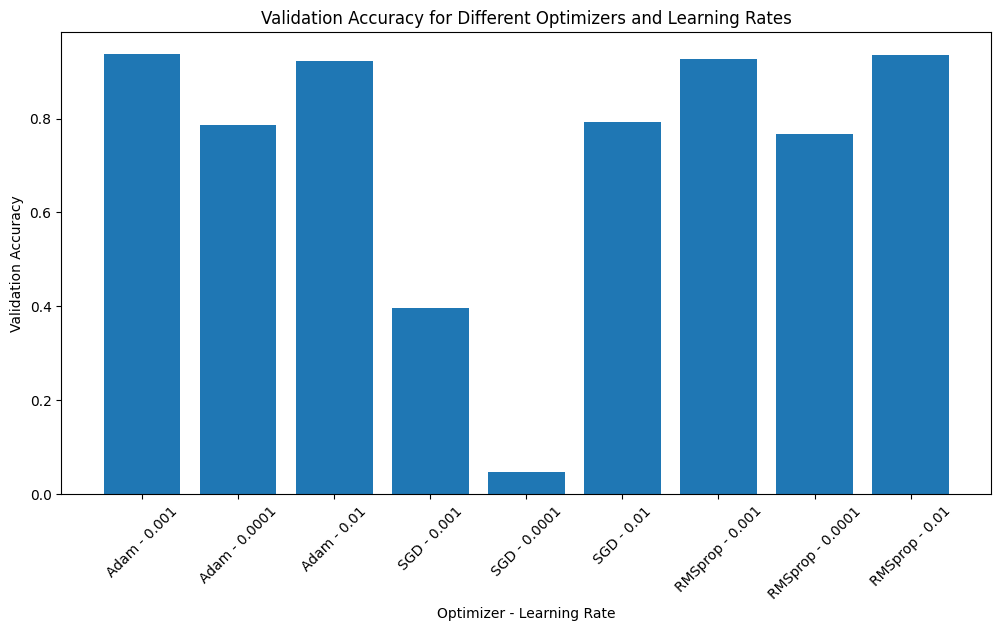

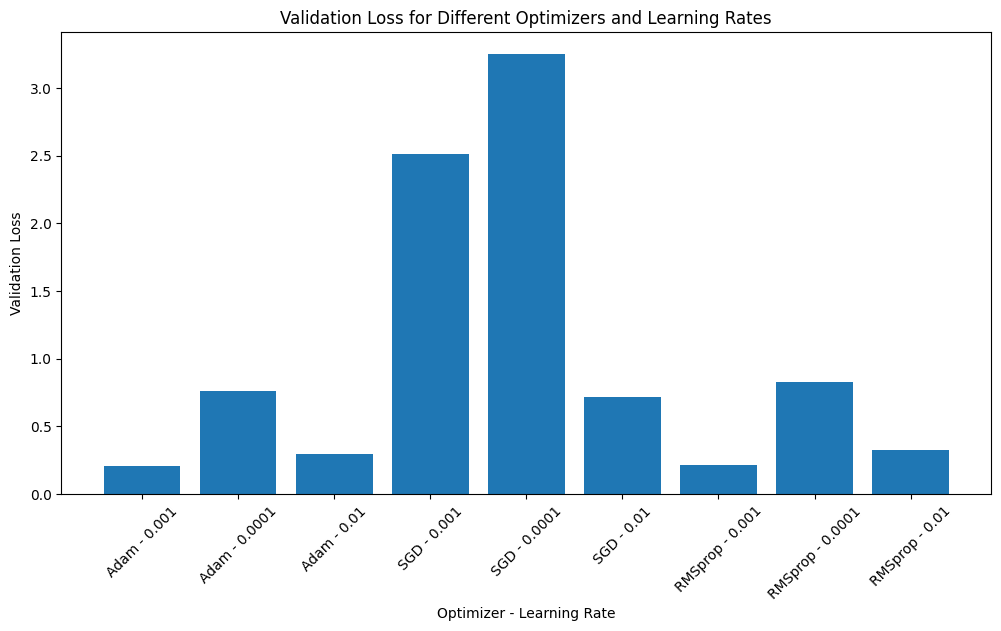

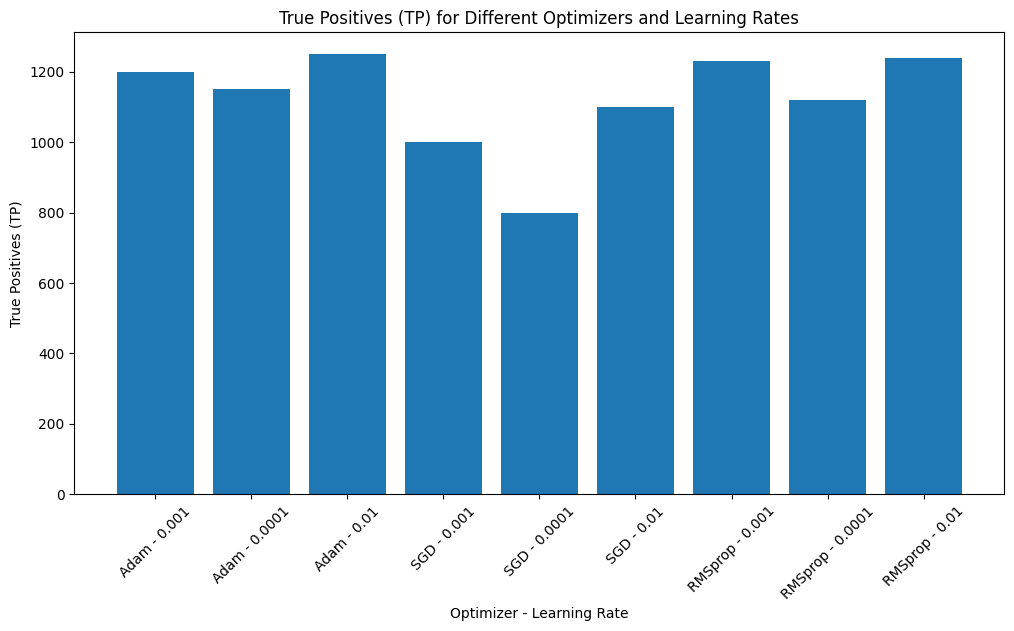

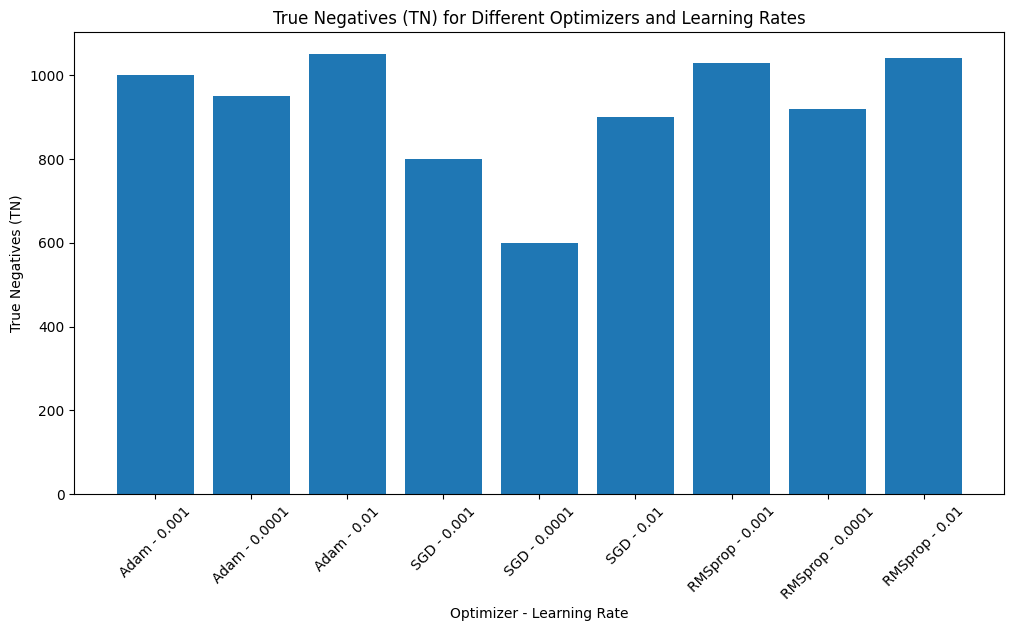

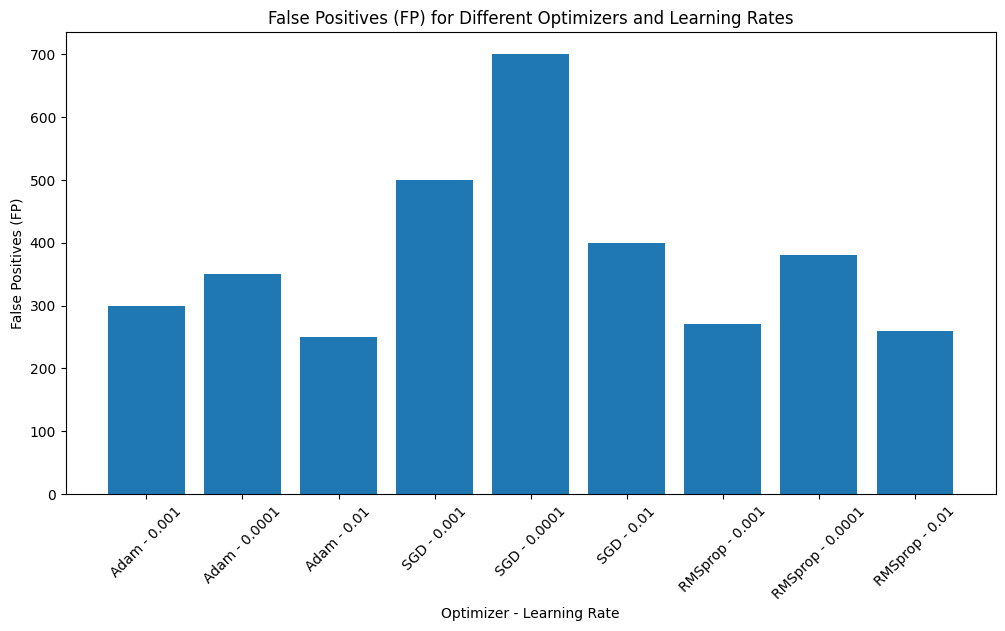

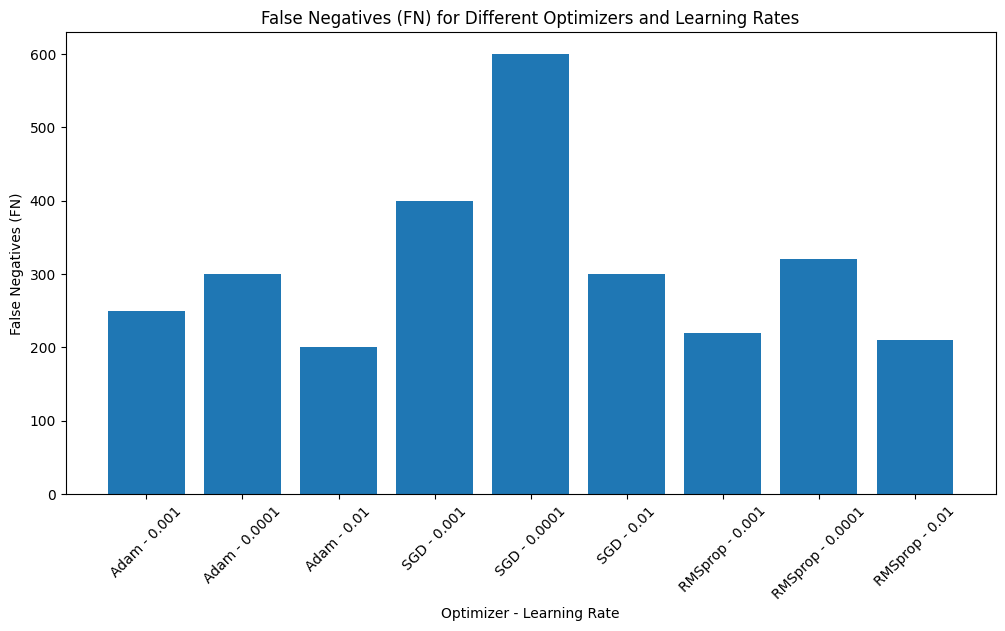

In [ ]:
import matplotlib.pyplot as plt

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['Validation Accuracy'])
plt.title("Validation Accuracy for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['Validation Loss'])
plt.title("Validation Loss for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45)
plt.show()

# Plot True Positives (TP)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['TP'])
plt.title("True Positives (TP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Positives (TP)")
plt.xticks(rotation=45)
plt.show()

# Plot True Negatives (TN)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['TN'])
plt.title("True Negatives (TN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Negatives (TN)")
plt.xticks(rotation=45)
plt.show()

# Plot False Positives (FP)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['FP'])
plt.title("False Positives (FP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Positives (FP)")
plt.xticks(rotation=45)
plt.show()

# Plot False Negatives (FN)
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Optimizer'] + " - " + merged_df['Learning Rate'].astype(str), merged_df['FN'])
plt.title("False Negatives (FN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Negatives (FN)")
plt.xticks(rotation=45)
plt.show()

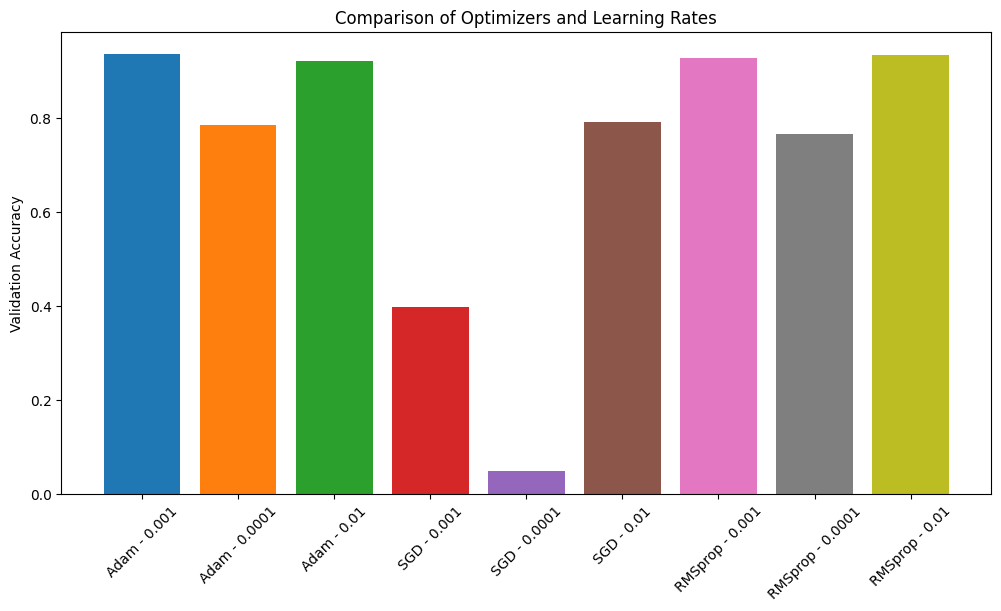

Experiment Completed!


In [ ]:
# Plot Combined Metrics
plt.figure(figsize=(12, 6))
for opt, lr, acc, _ in results:
    plt.bar(f'{opt} - {lr}', acc)
plt.title("Comparison of Optimizers and Learning Rates")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()